In [1]:
import sys

sys.path.append('..')
print(sys.path)

['/workspaces/ML-AI-Automation/notebooks', '/usr/local/python/3.10.13/lib/python310.zip', '/usr/local/python/3.10.13/lib/python3.10', '/usr/local/python/3.10.13/lib/python3.10/lib-dynload', '', '/home/codespace/.cache/pypoetry/virtualenvs/ml-ai-automation-FvOh802b-py3.10/lib/python3.10/site-packages', '..']


In [2]:
from utils.pandas_utils import CleanData
from utils.logger_utils import Logger
from pathlib import Path
from utils.cleanlab_utils import CleanLab
from utils.eda_utils import EDA
import numpy as np

/home/codespace/.cache/pypoetry/virtualenvs/ml-ai-automation-FvOh802b-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
#raw_df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [38]:
#file_path = os.path.join('../data/raw_data/','credit_fraud.pkl')
#raw_df.to_pickle(file_path)

In [3]:
cl = CleanData()
raw_df=cl.read_pkl('/workspaces/ML-AI-Automation/data/raw_data/credit_fraud.pkl')

In [4]:
raw_df['Class'].unique()

array([0, 1])

In [6]:
eda = EDA()

report = eda.sweetviz_eda(raw_df, 'Class')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:03 -> (00:00 left)


The below Viz shows that variables V1, V2, V3, V4, V5, V6, V7, V9, V10, V11, V12, V14, V16, V17, V18 are correlated and should be used to train our model


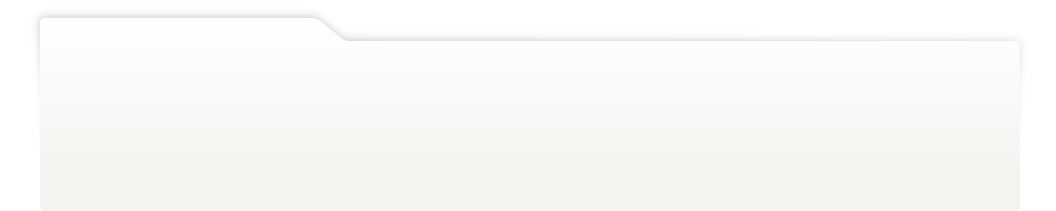
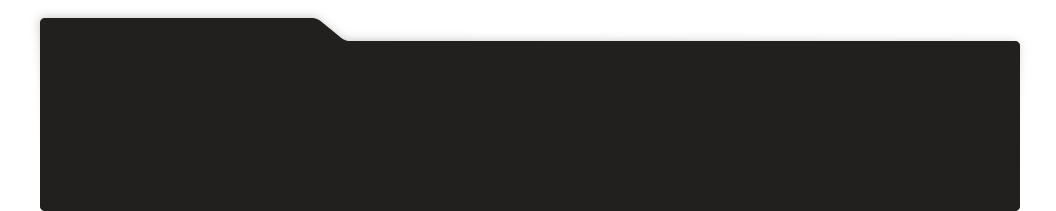
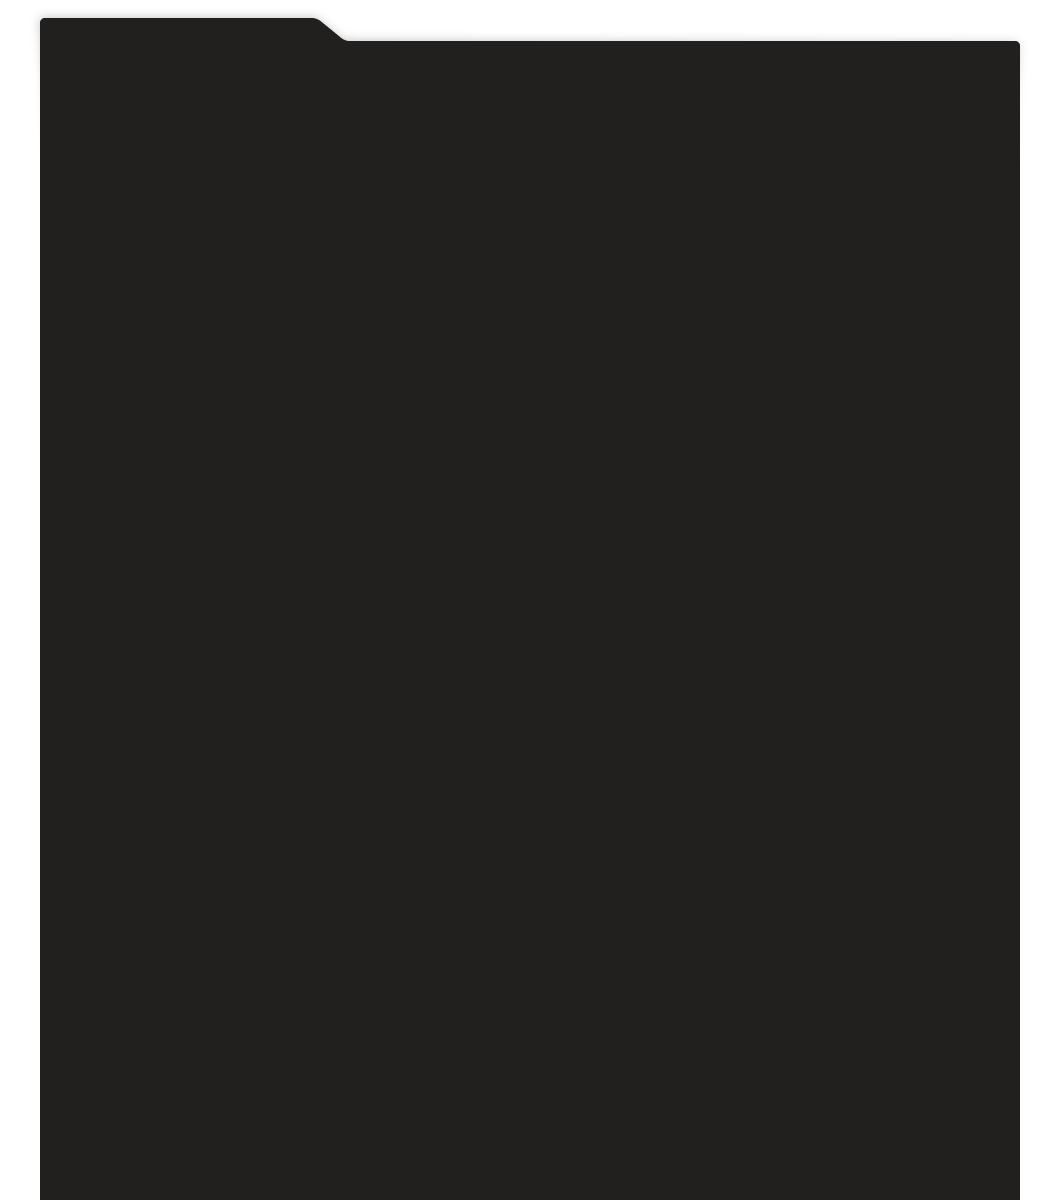
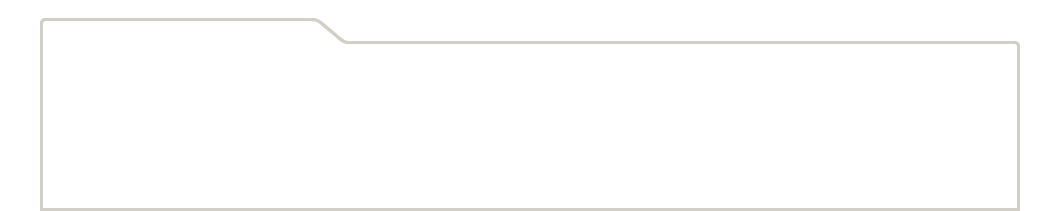
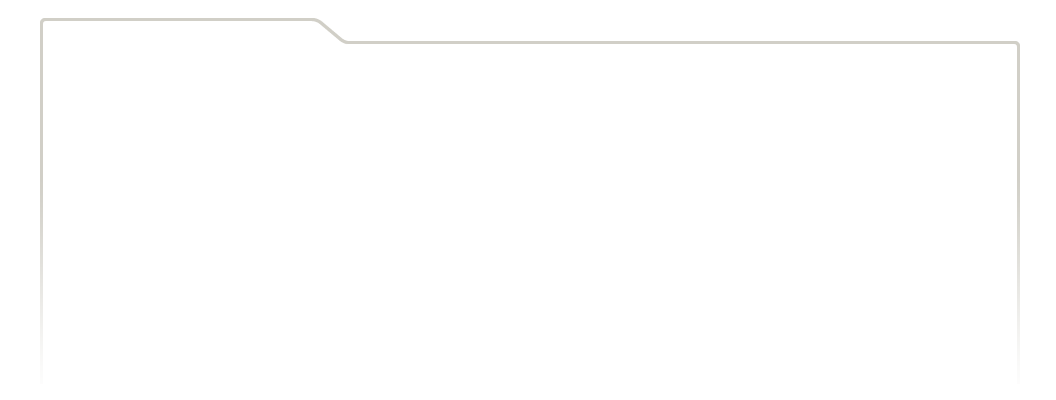
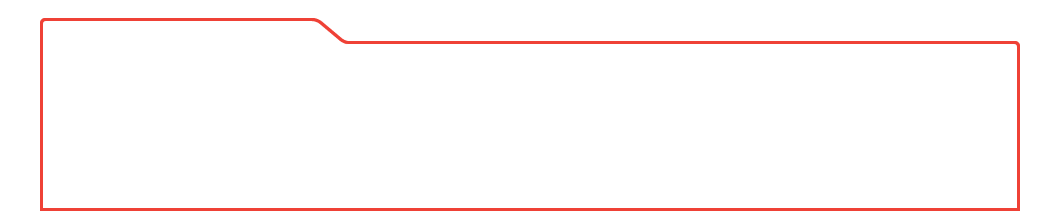
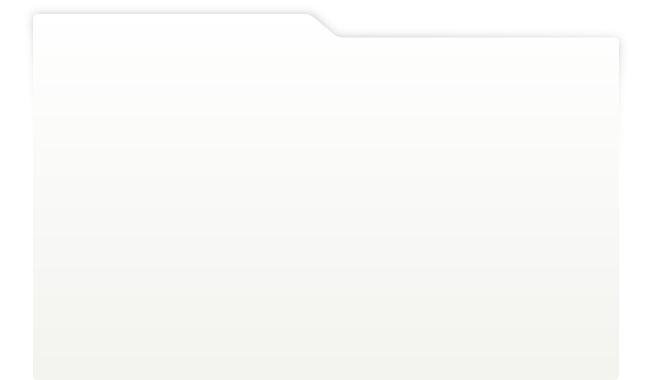
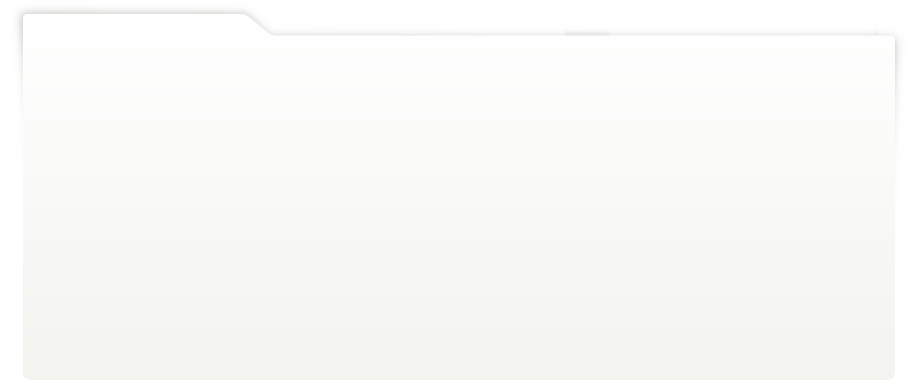
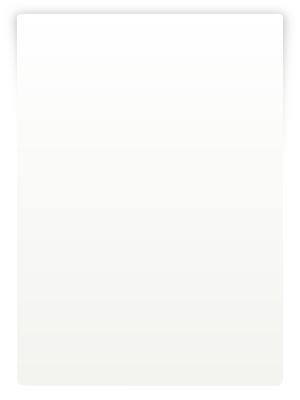
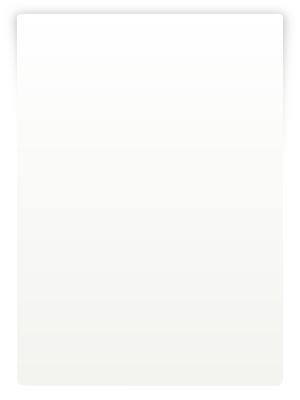
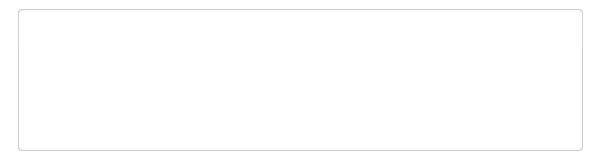
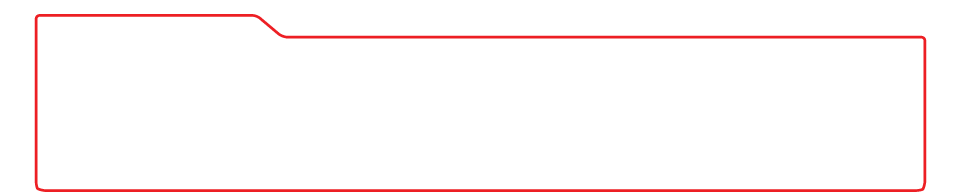
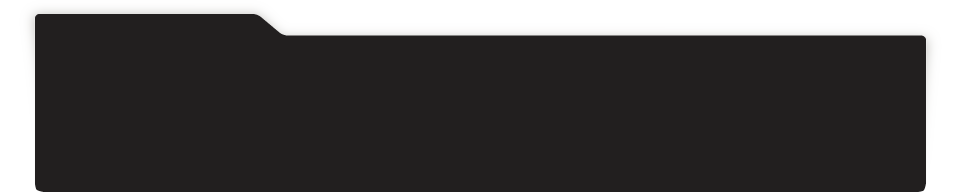
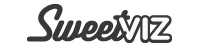
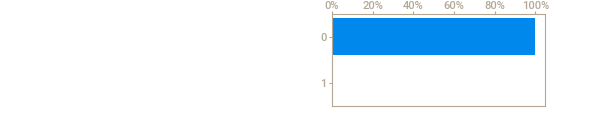
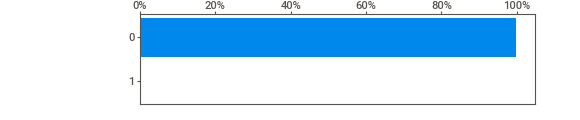
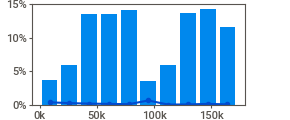
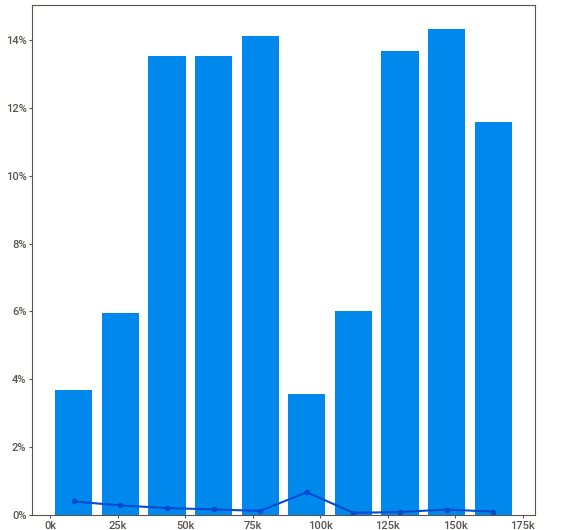
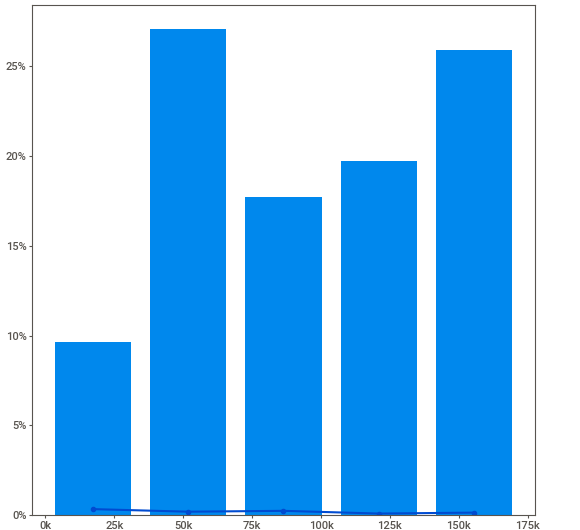
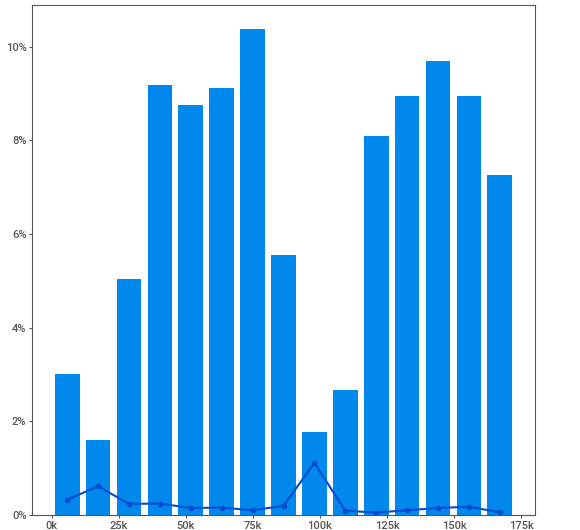
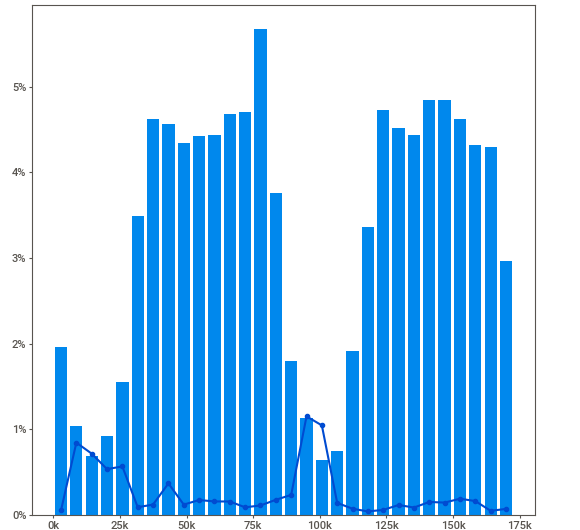
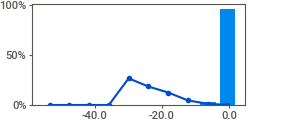
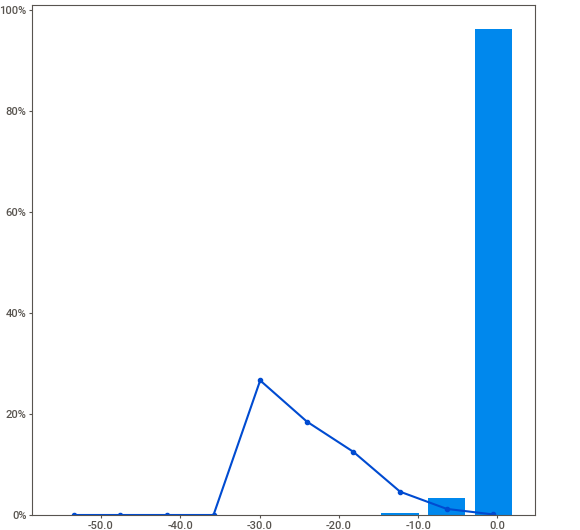
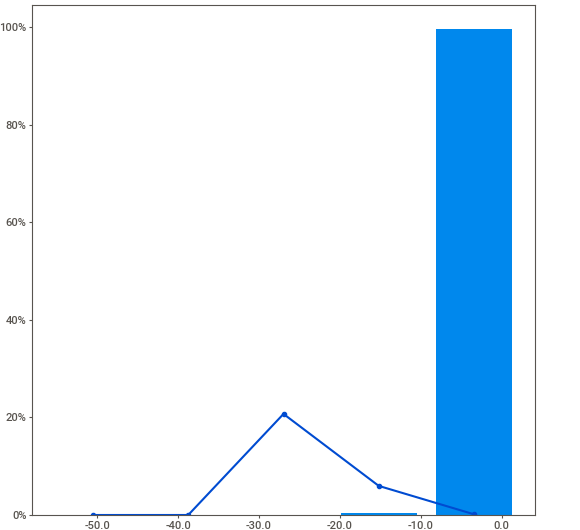
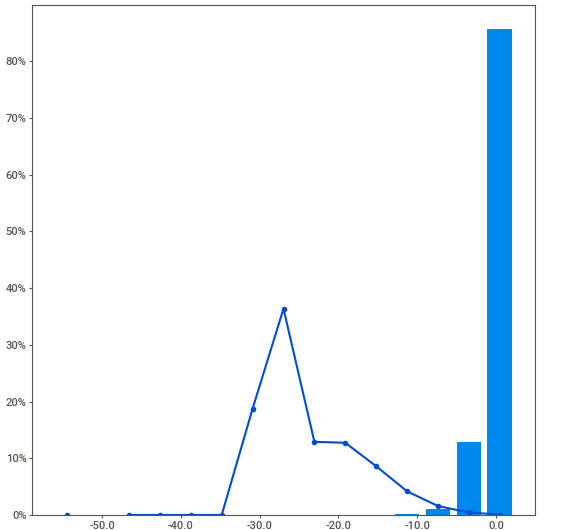
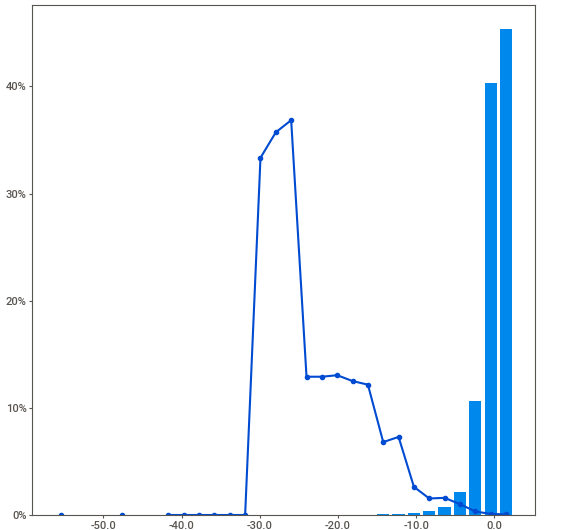
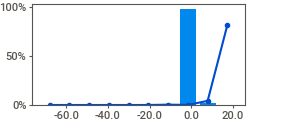
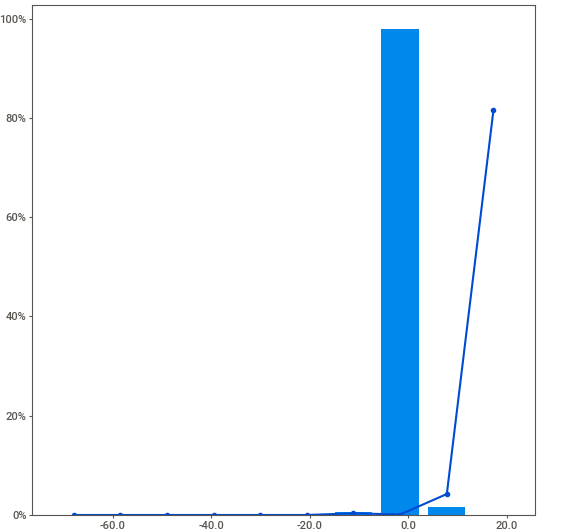
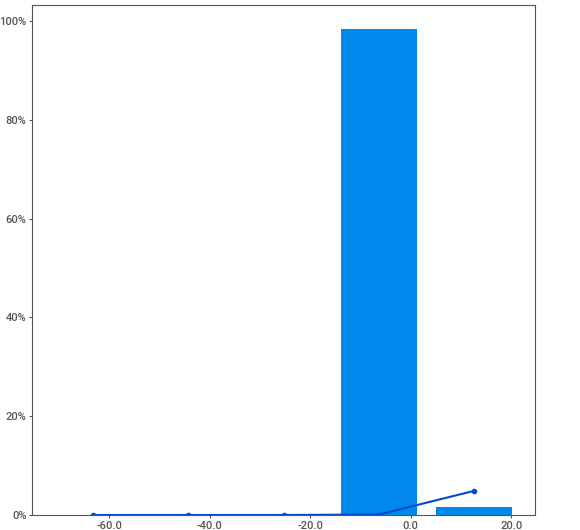
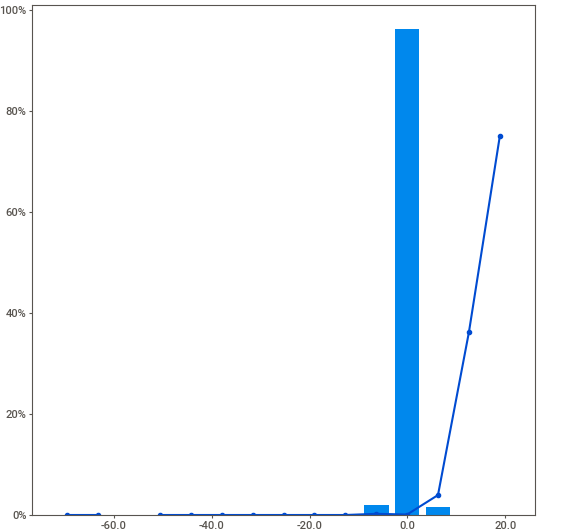
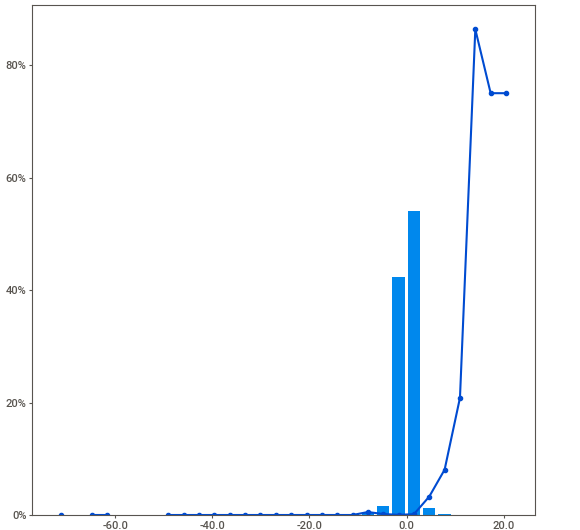
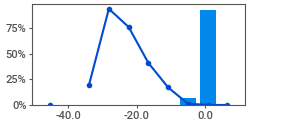
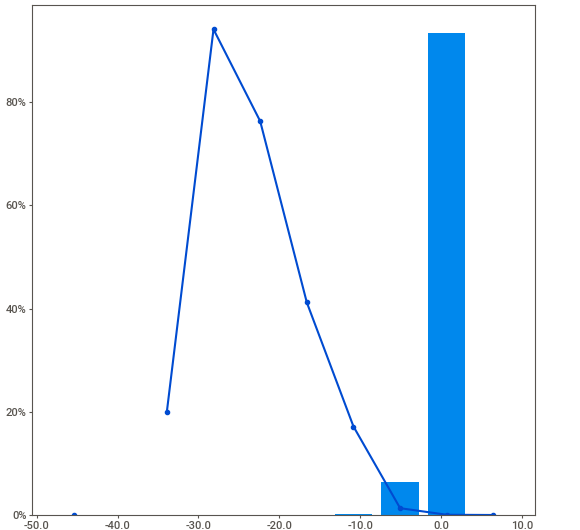
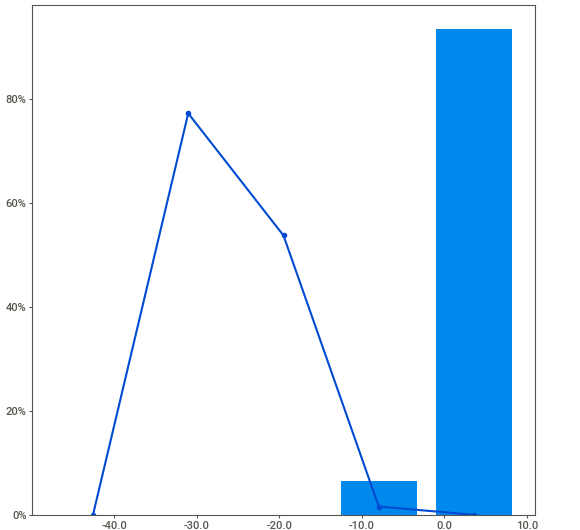
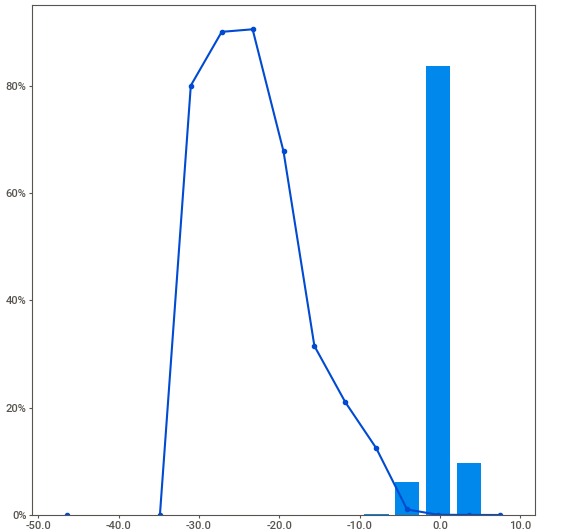
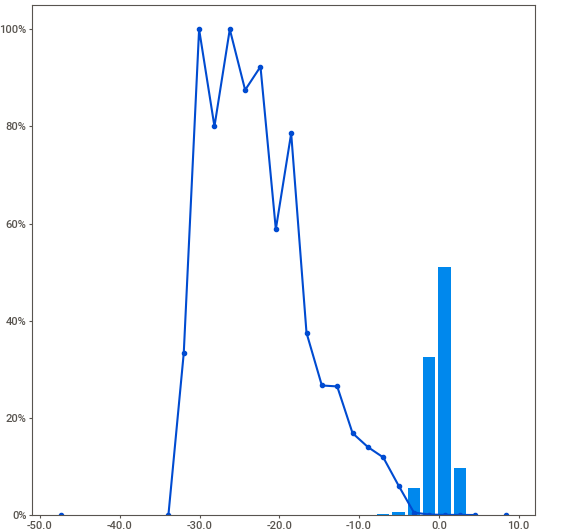
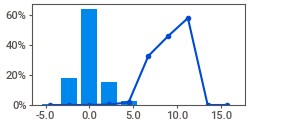
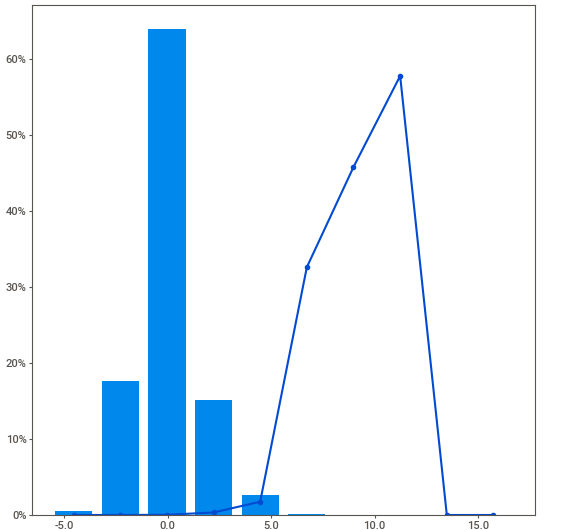
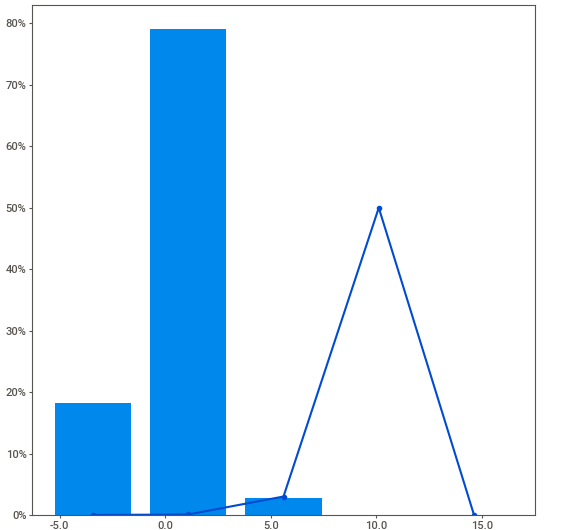
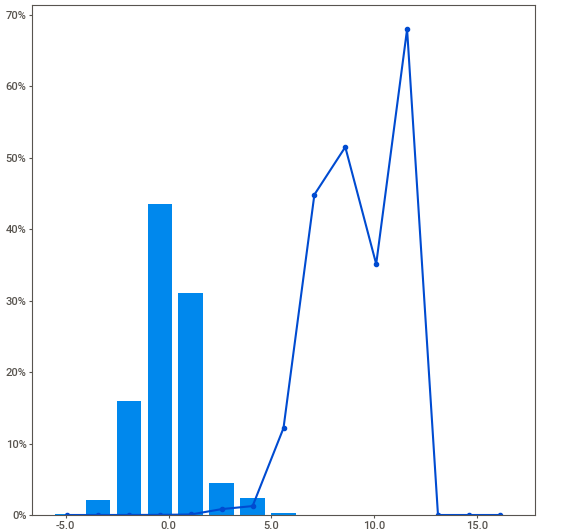
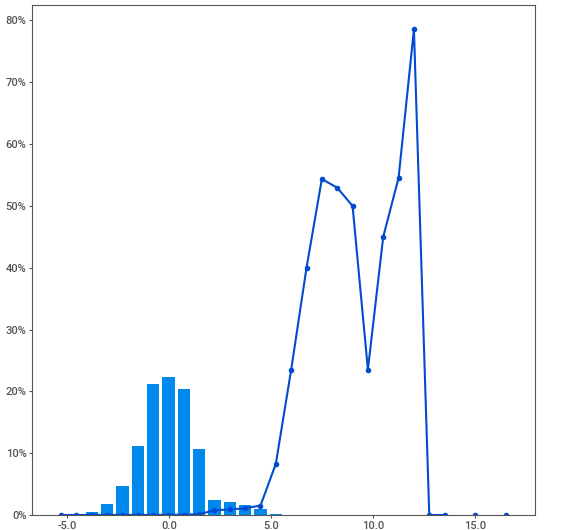
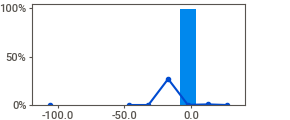
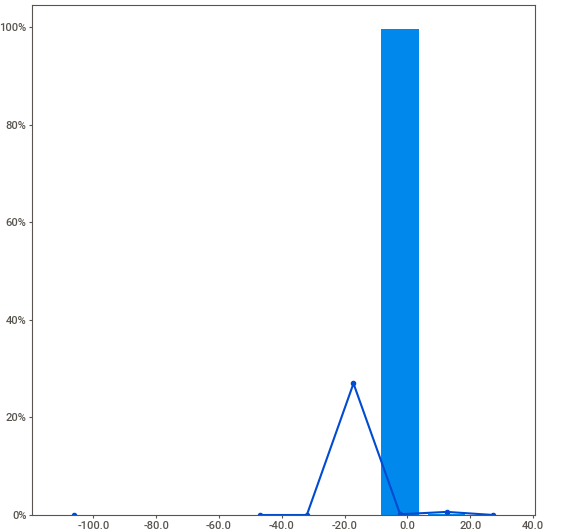
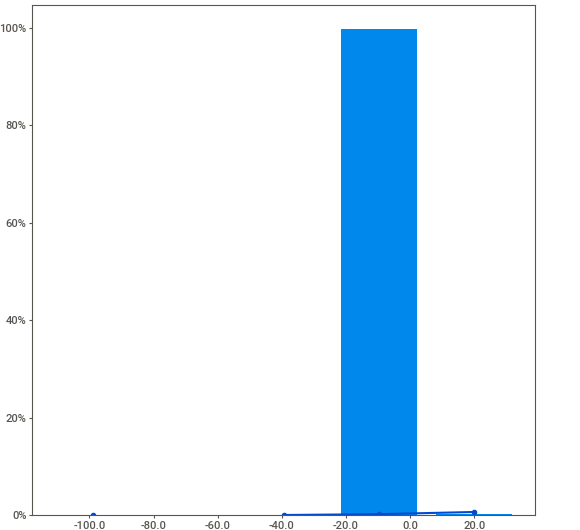
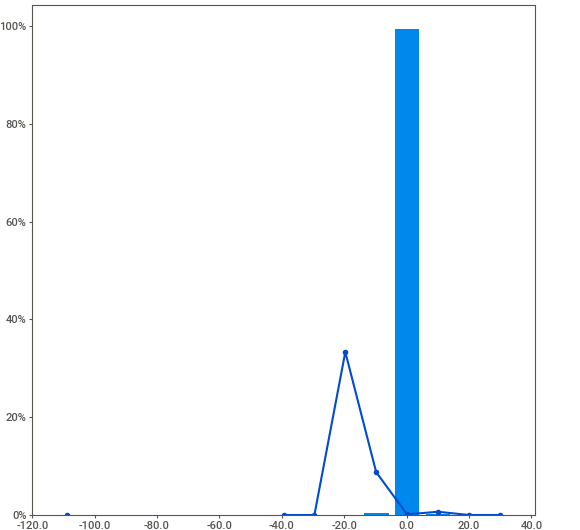
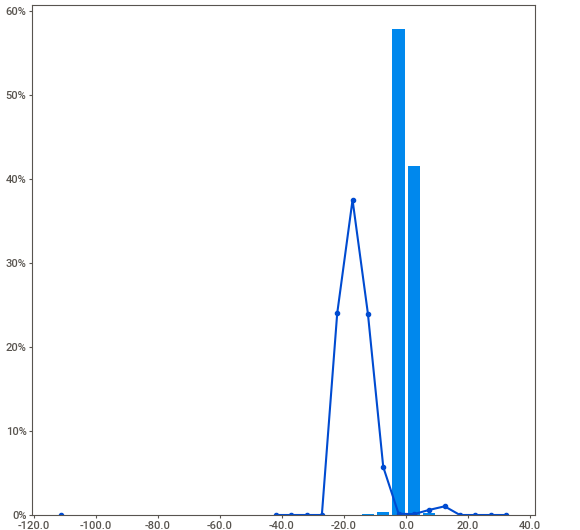
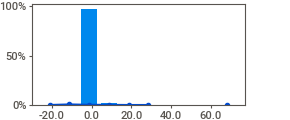
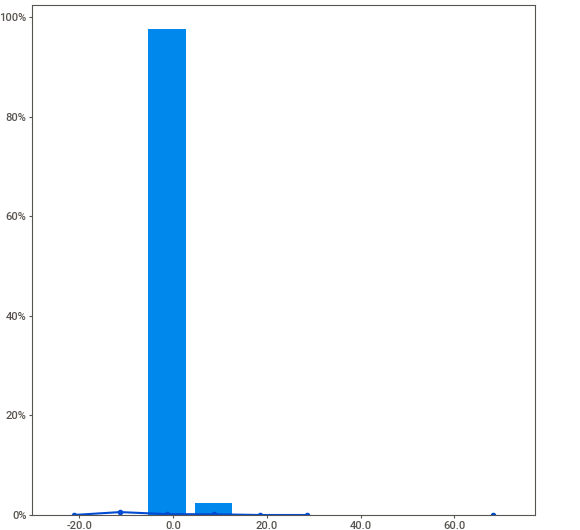
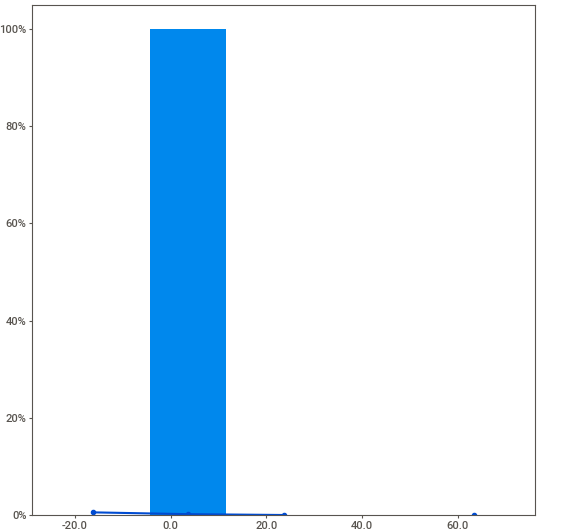
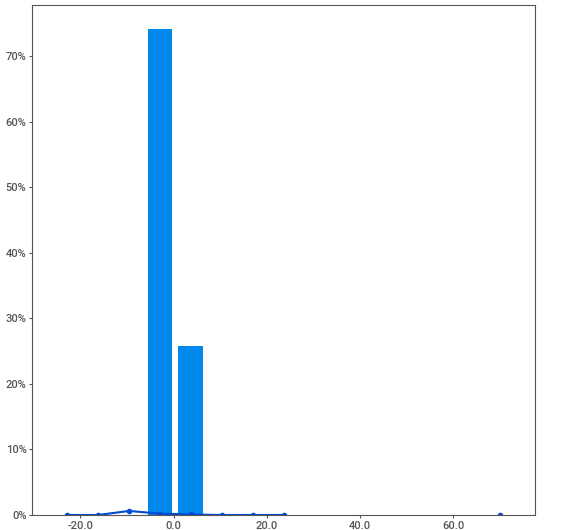
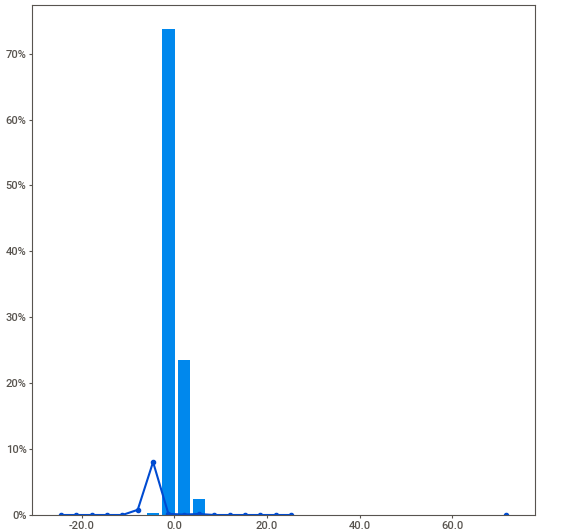
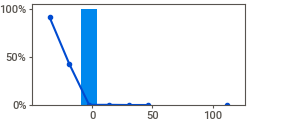
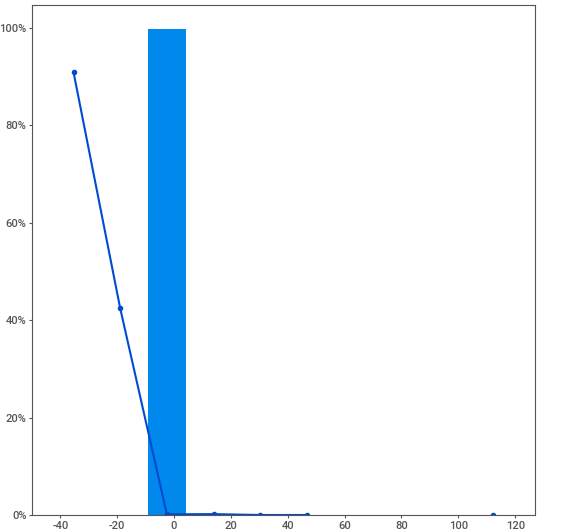
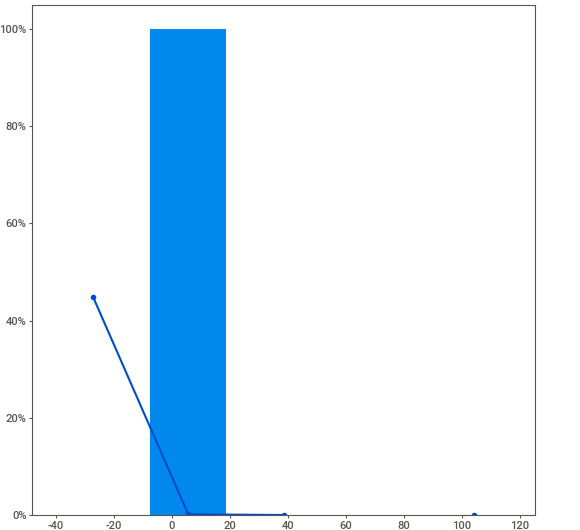
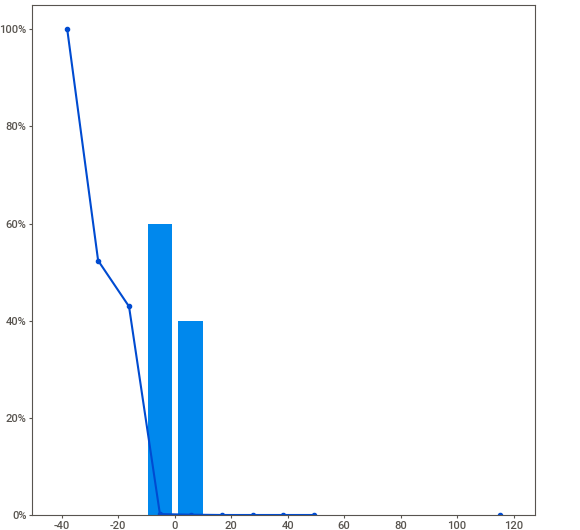
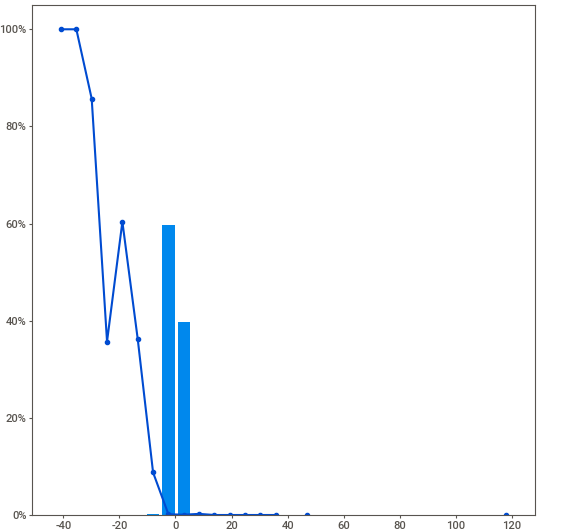
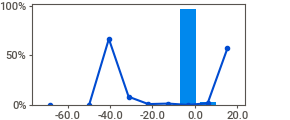
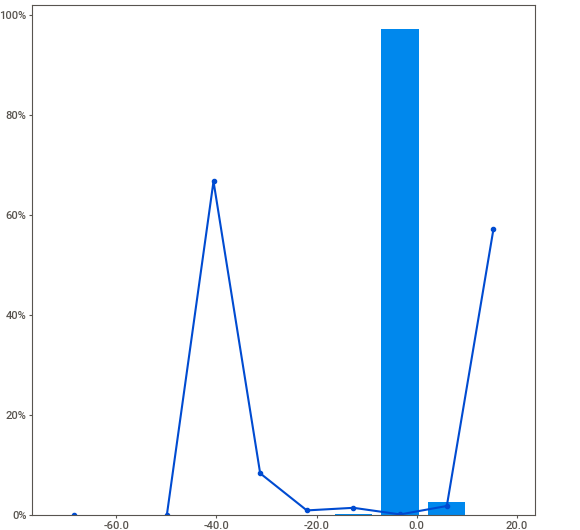
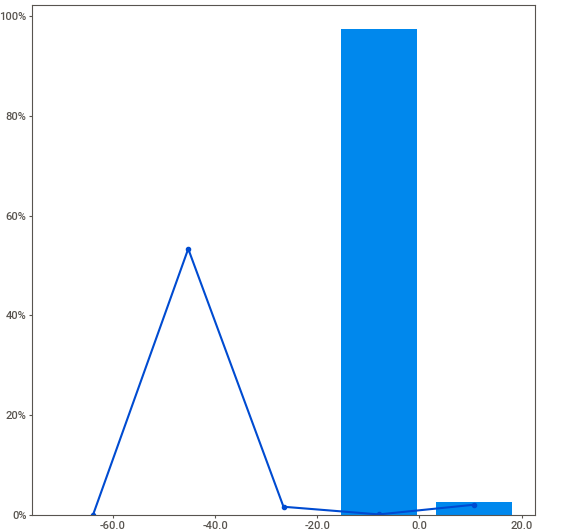
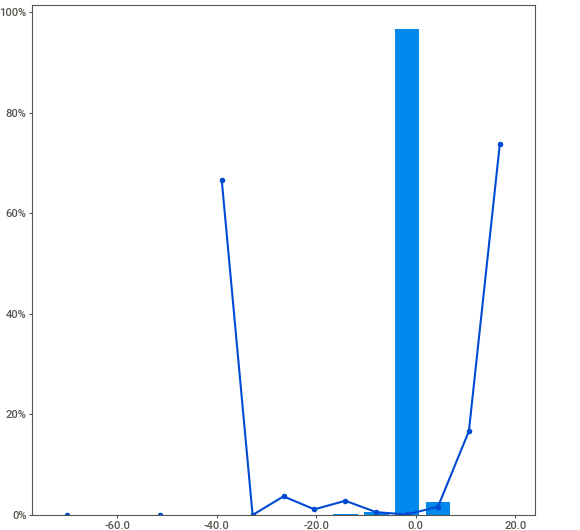
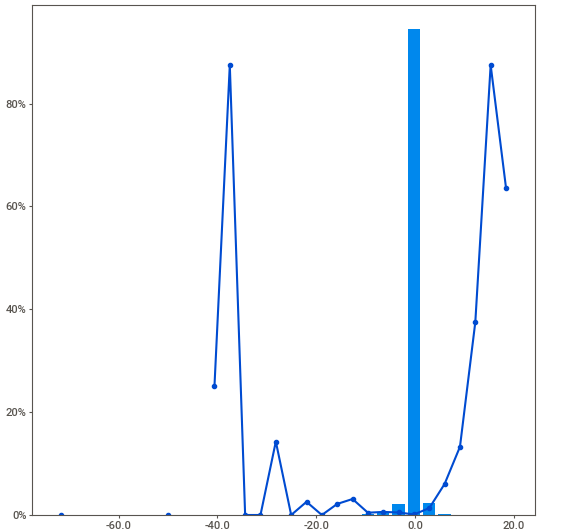
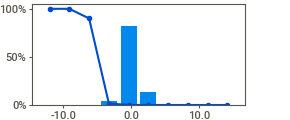
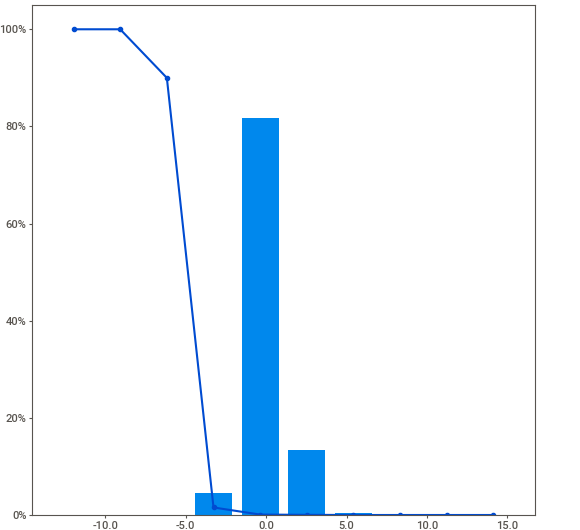
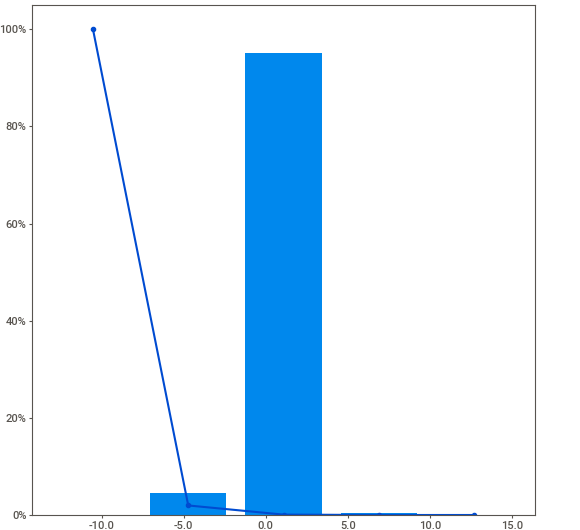
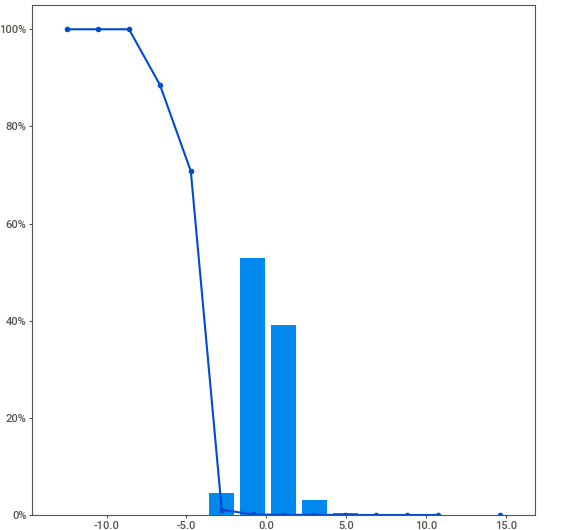
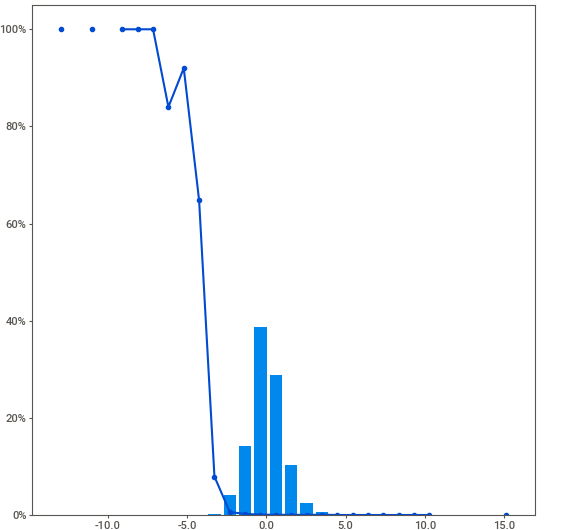
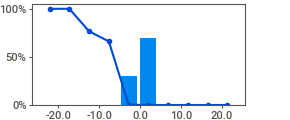
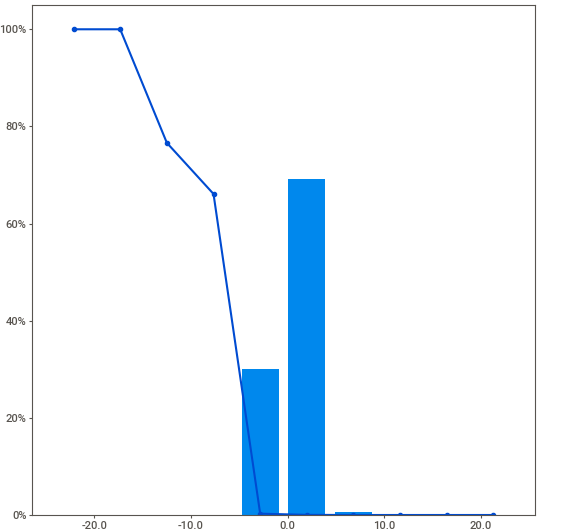
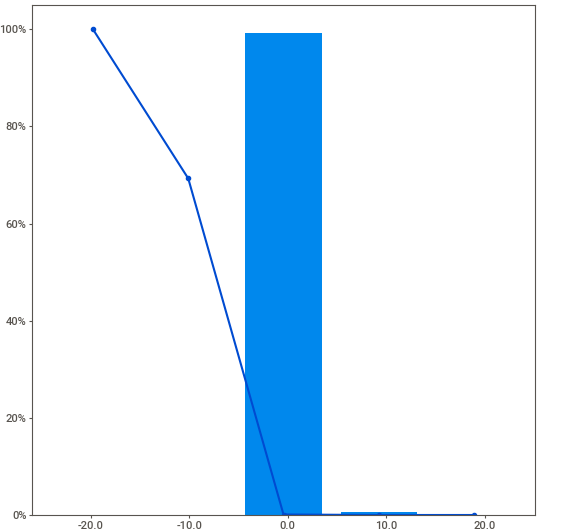
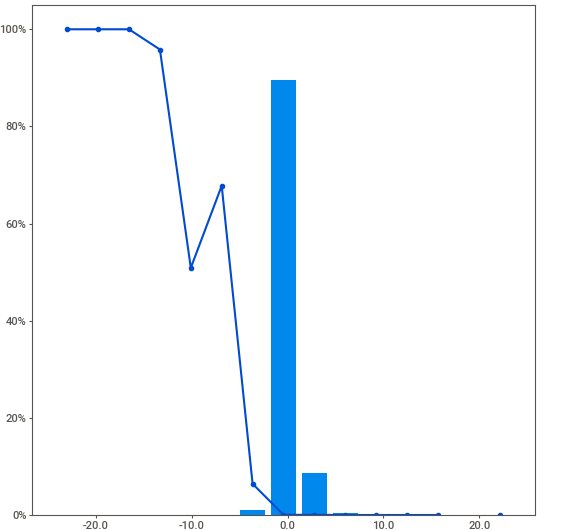
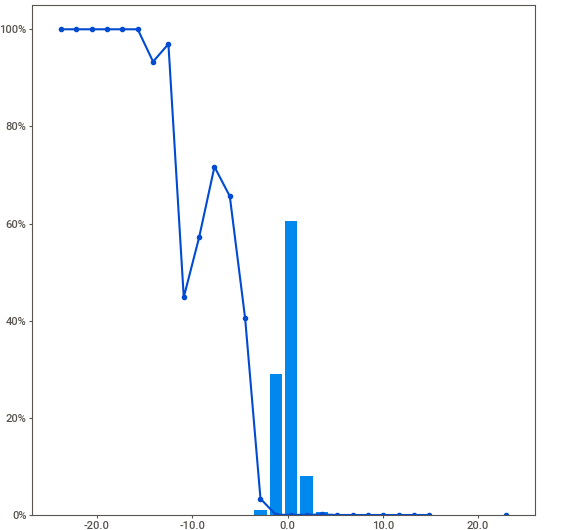
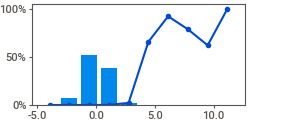
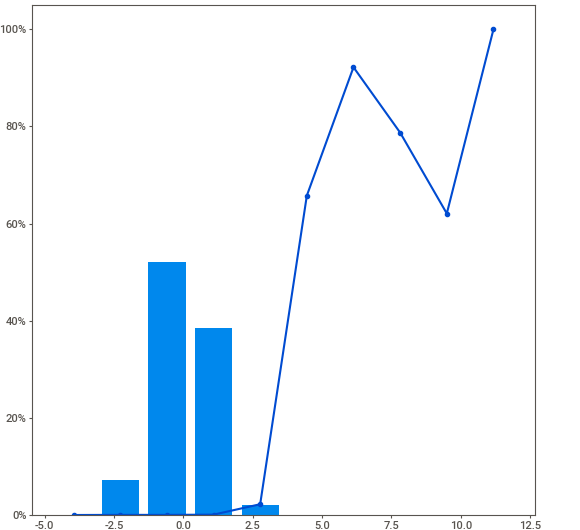
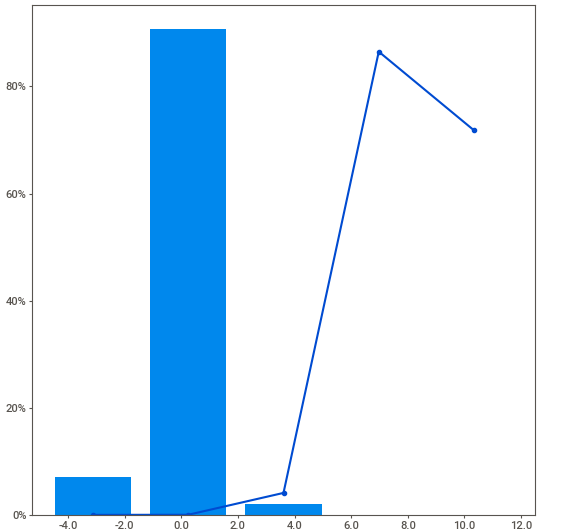
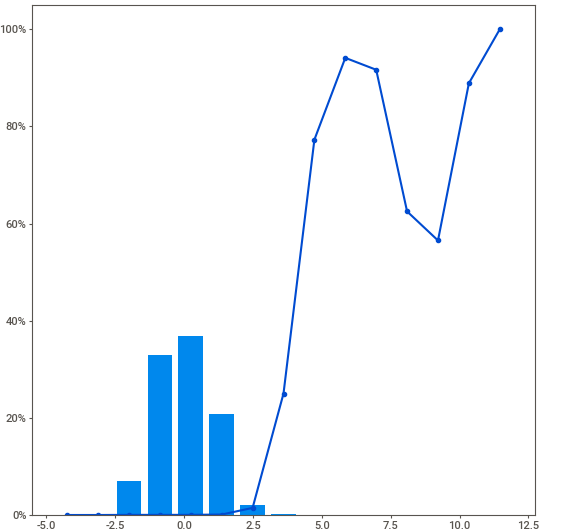
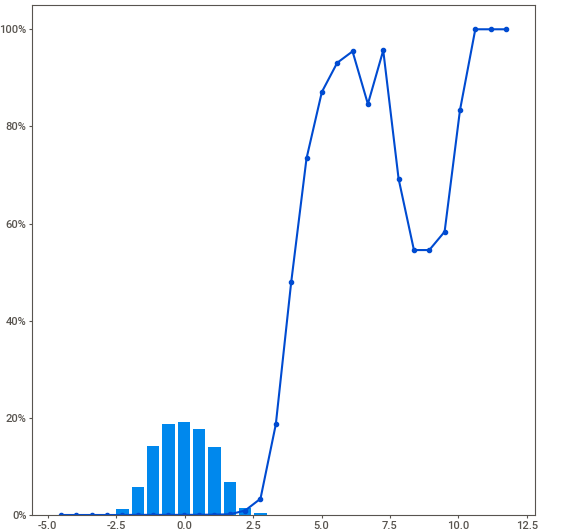
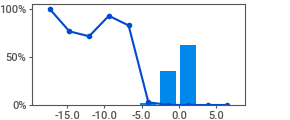
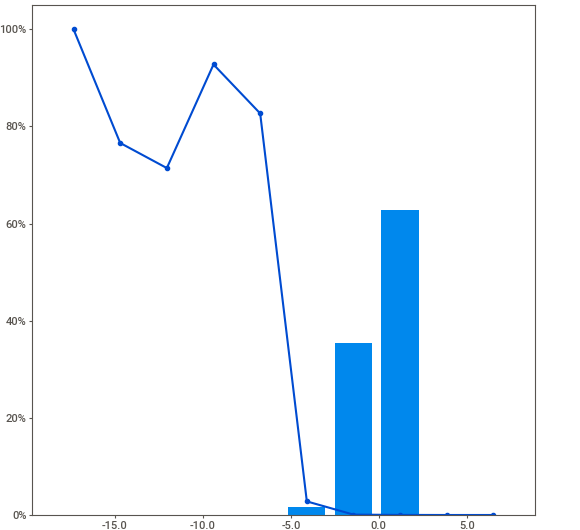
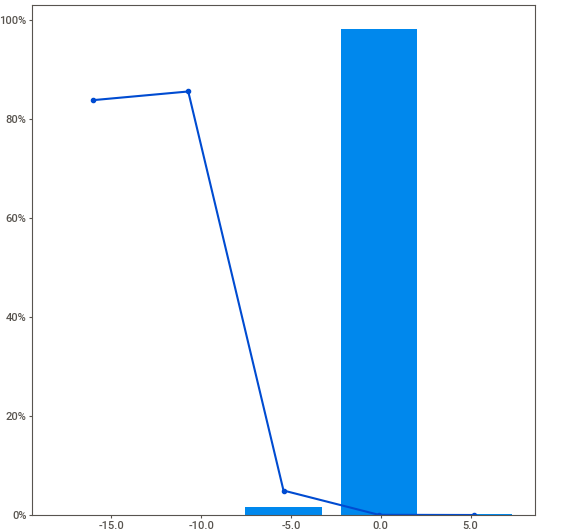
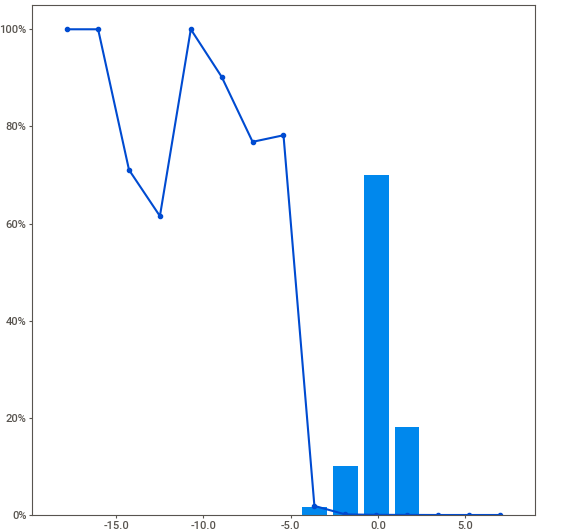
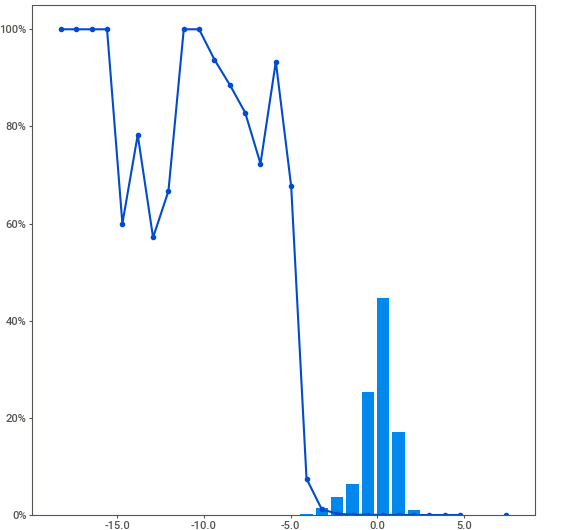
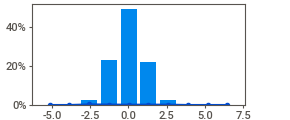
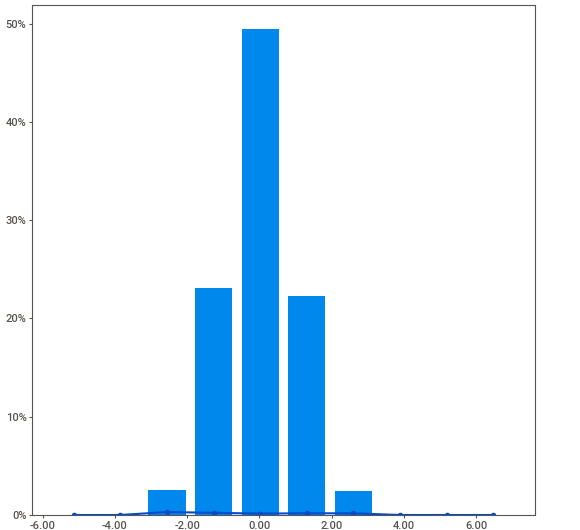
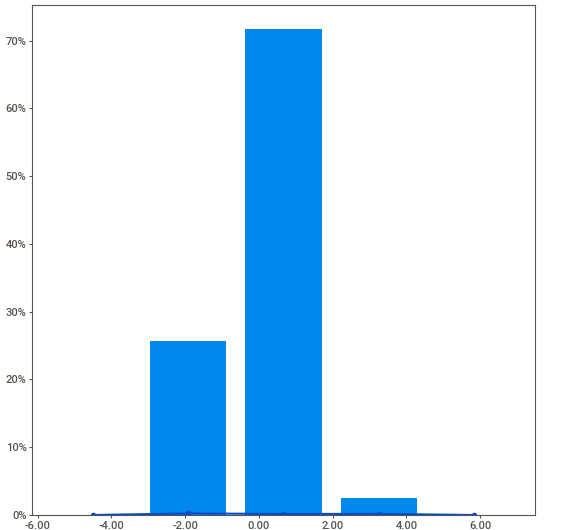
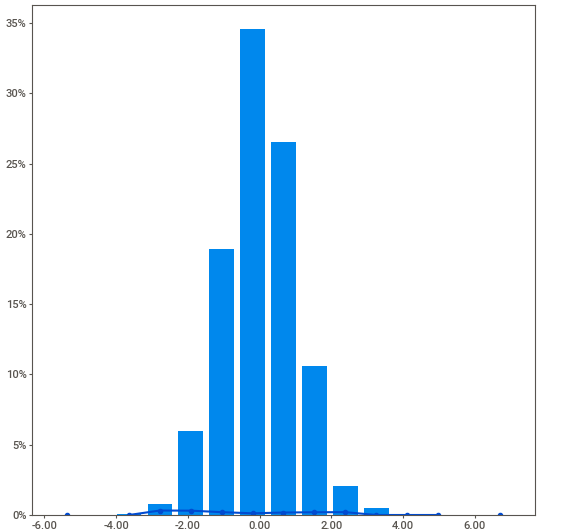
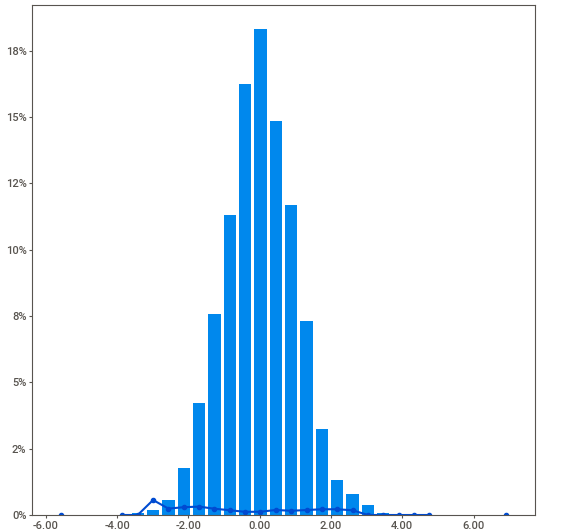
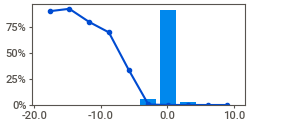
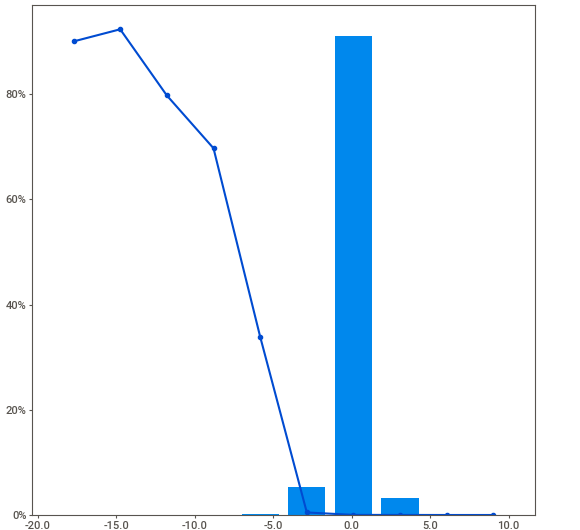
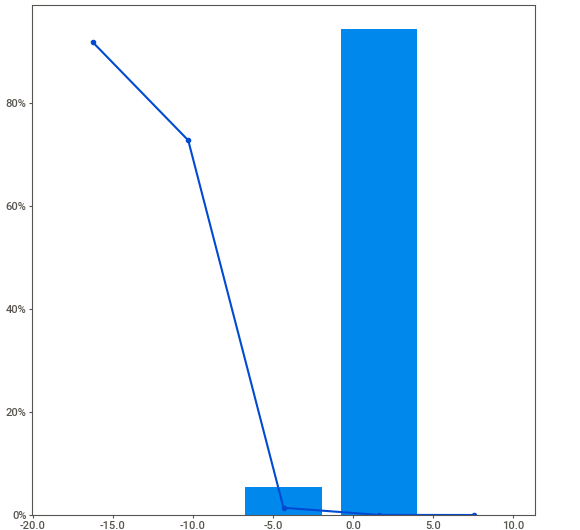
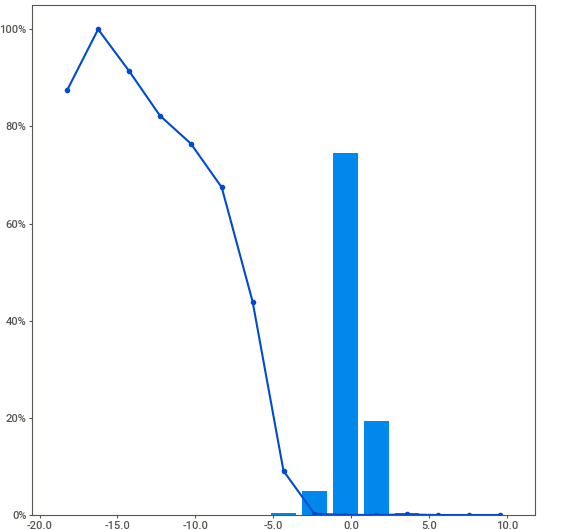
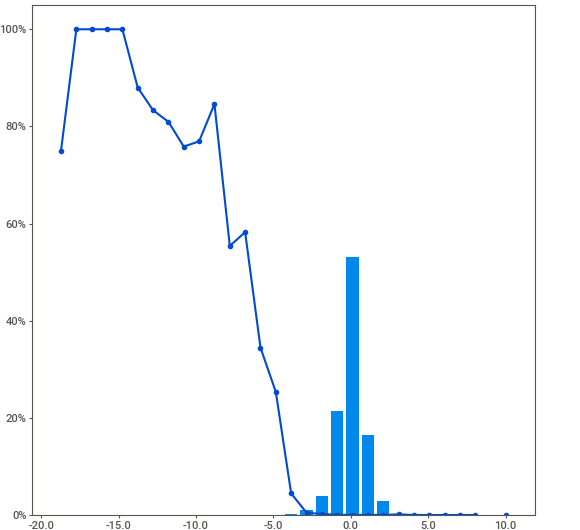
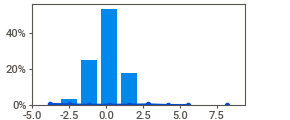
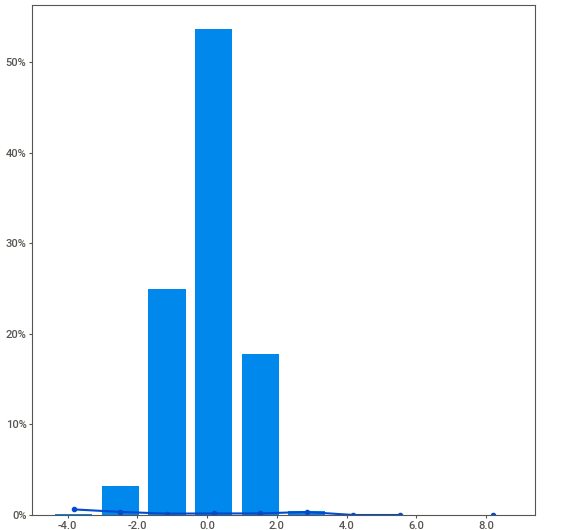
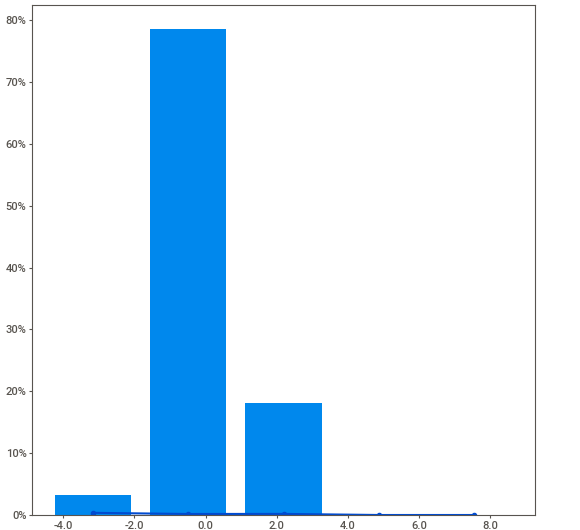
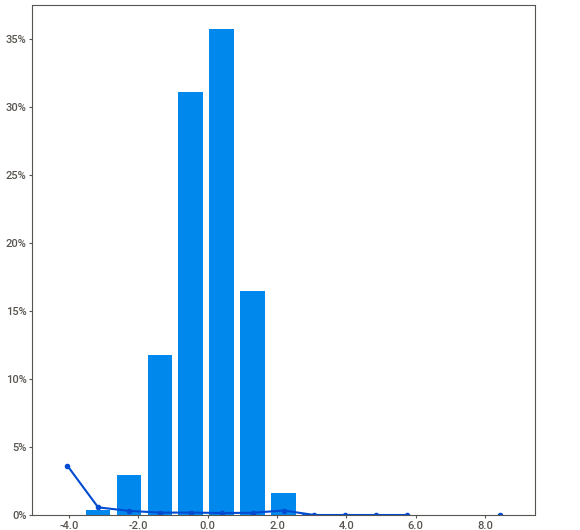
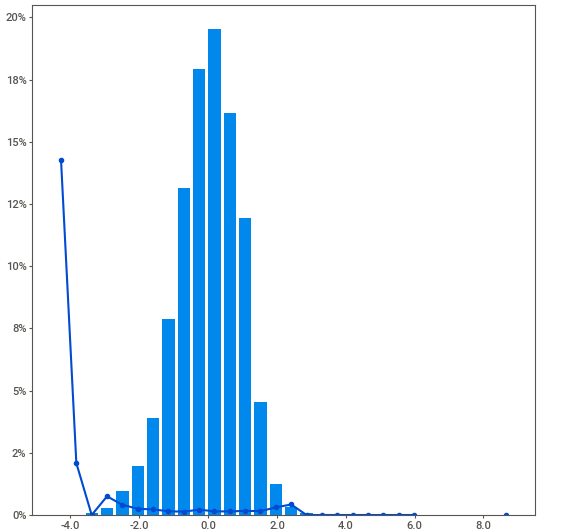
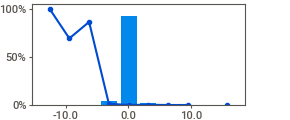
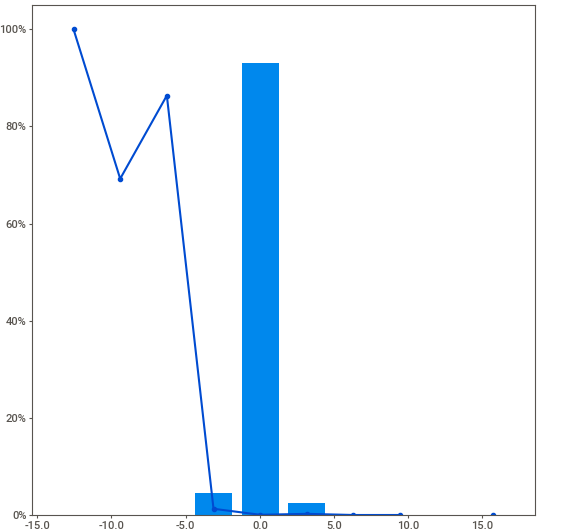
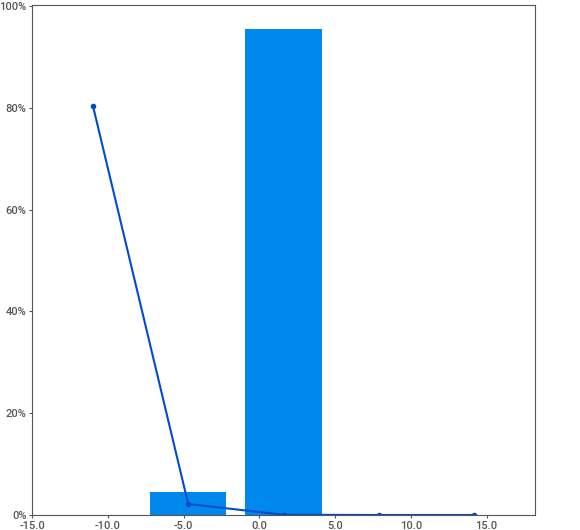
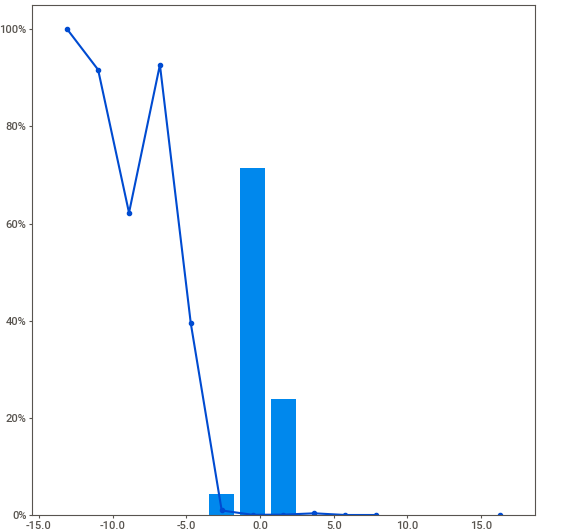
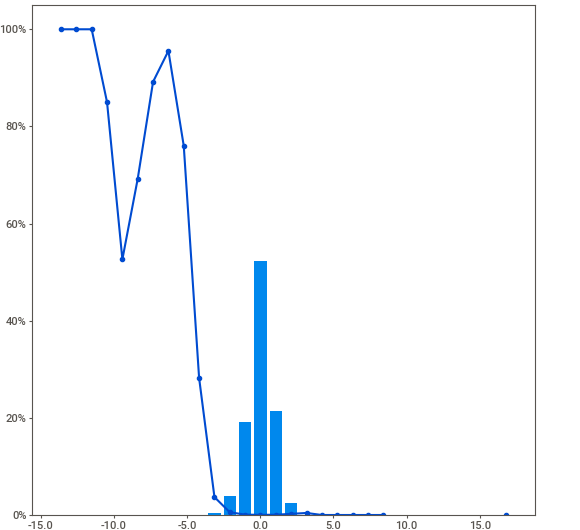
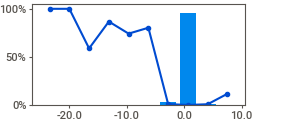
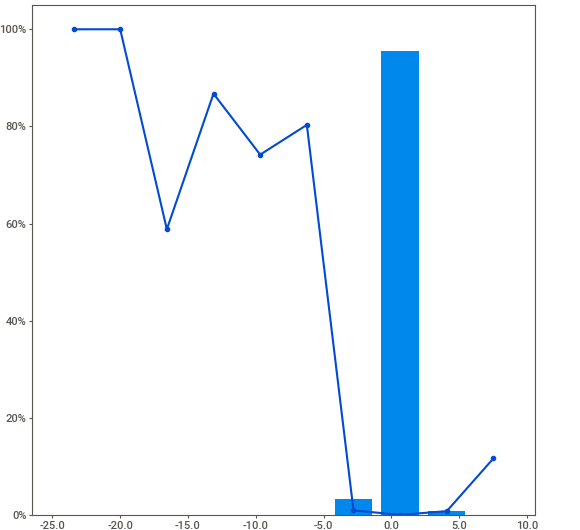
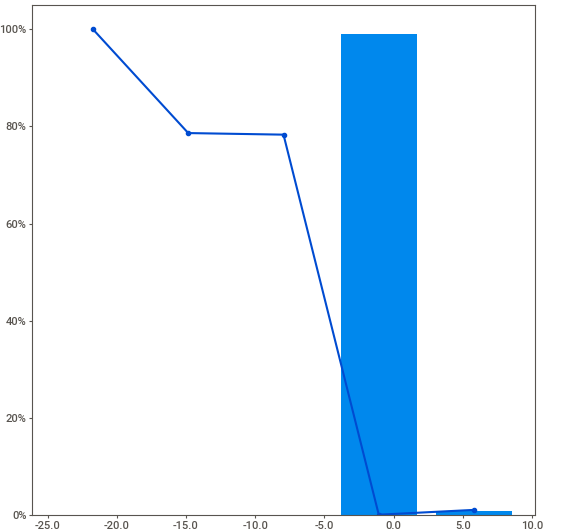
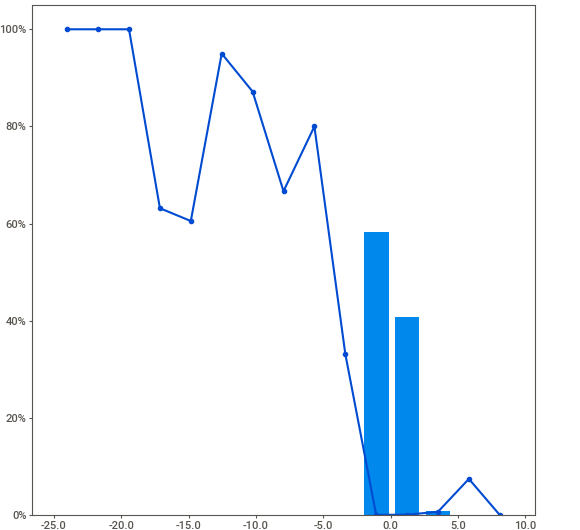
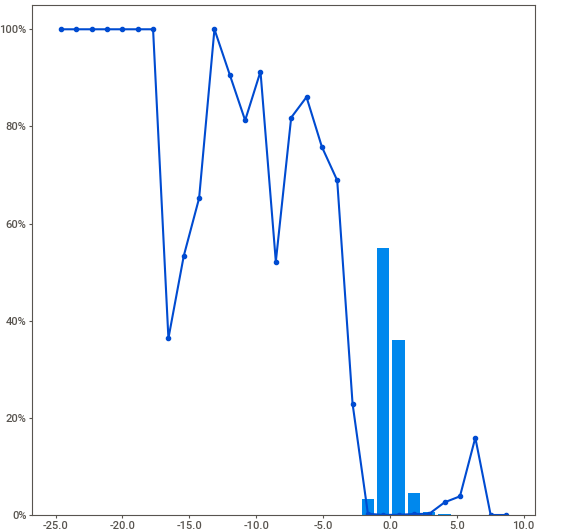
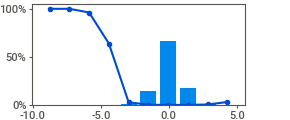
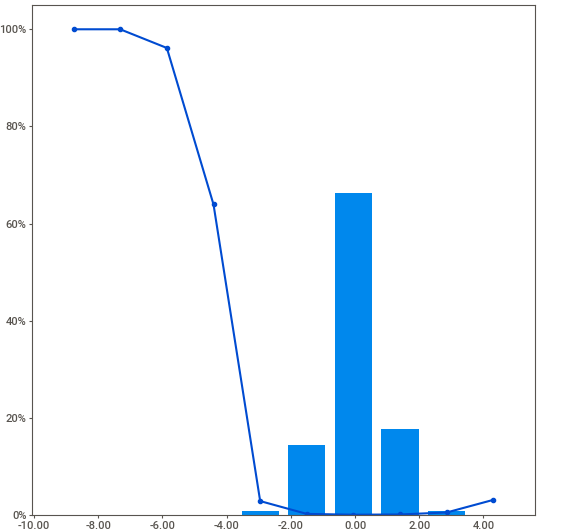
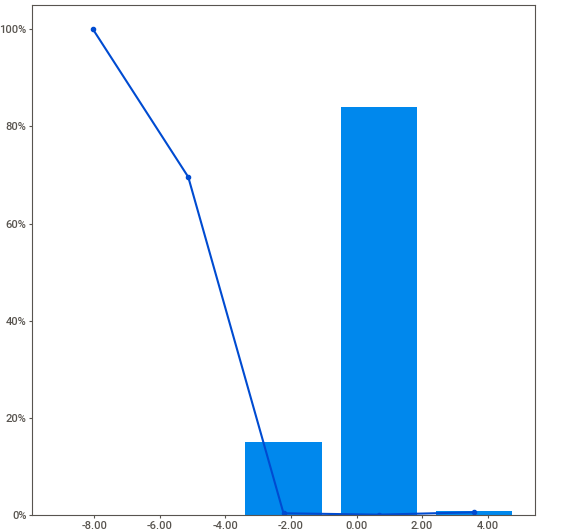
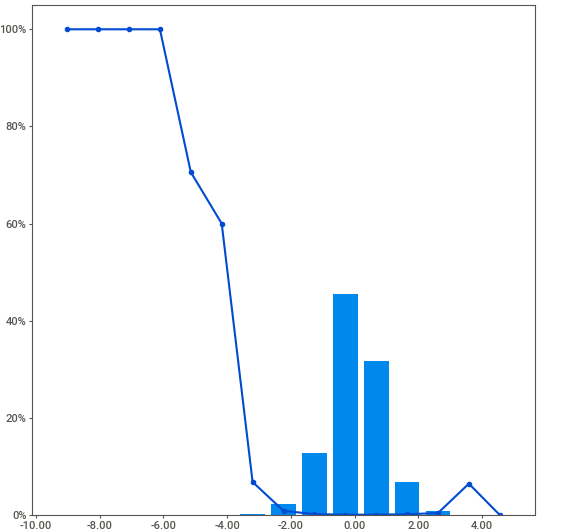
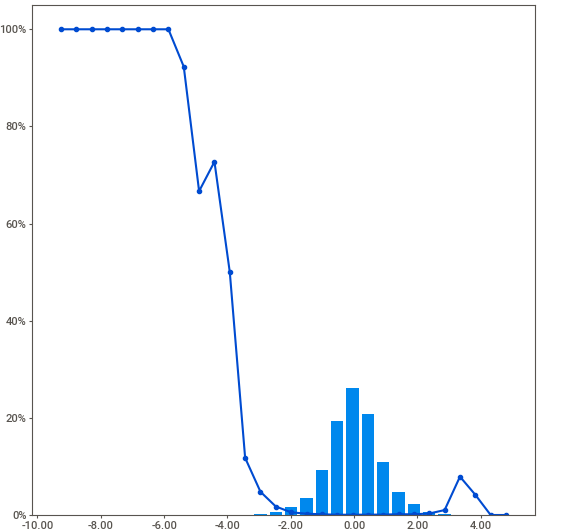
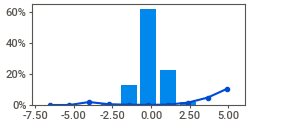
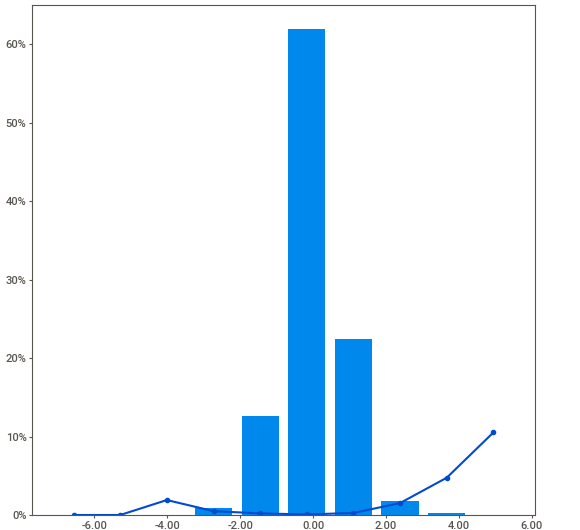
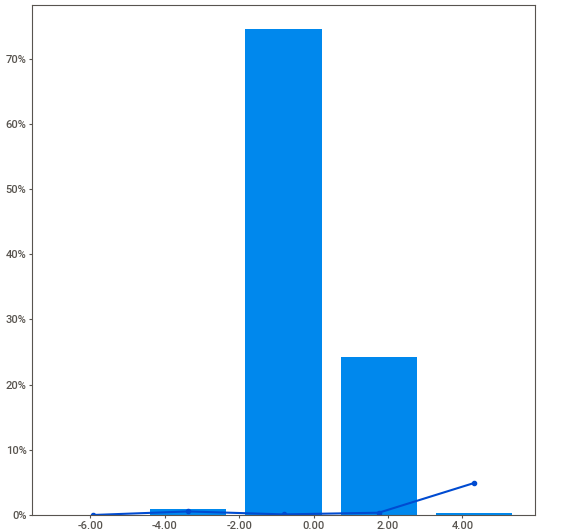
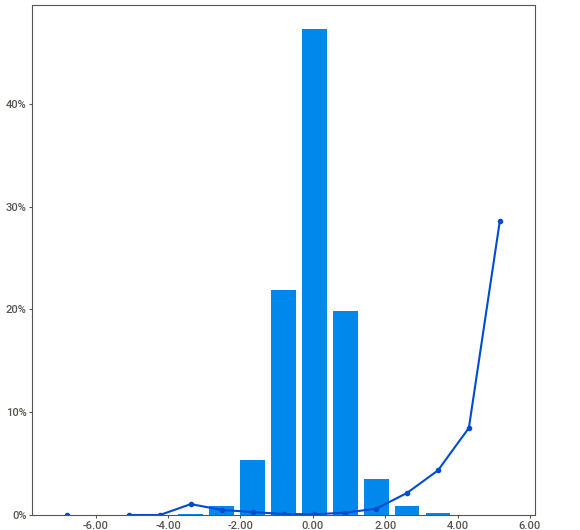
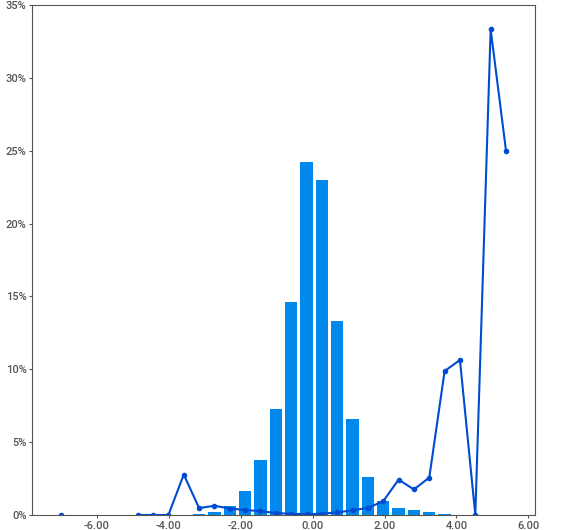
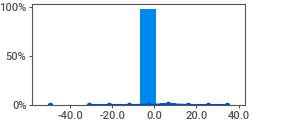
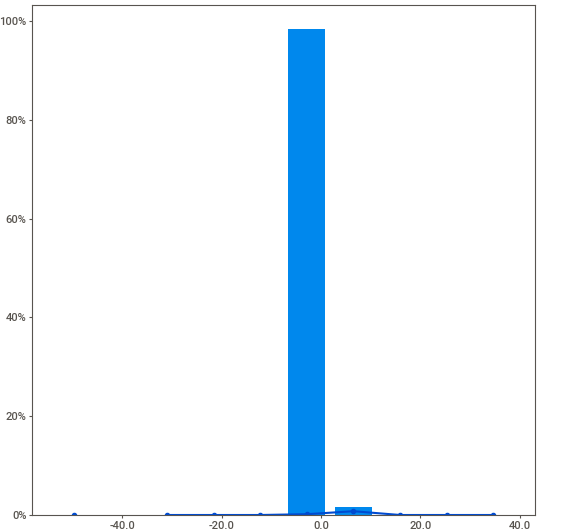
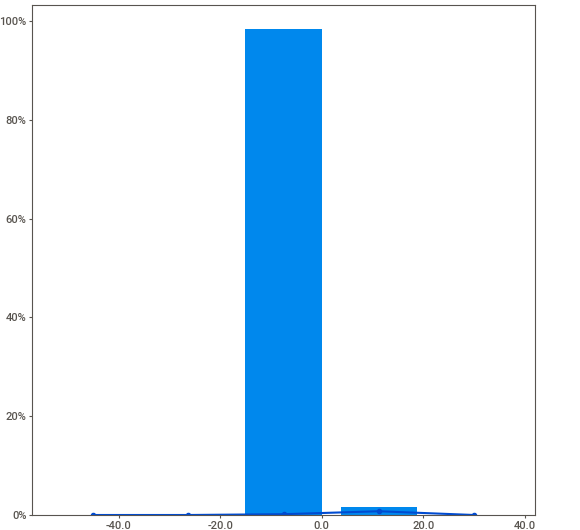
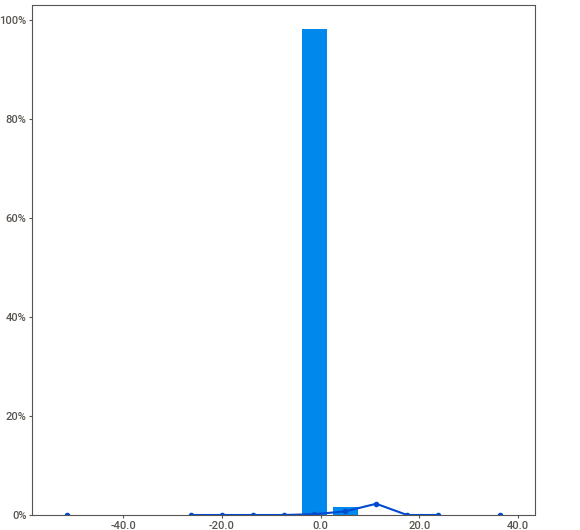
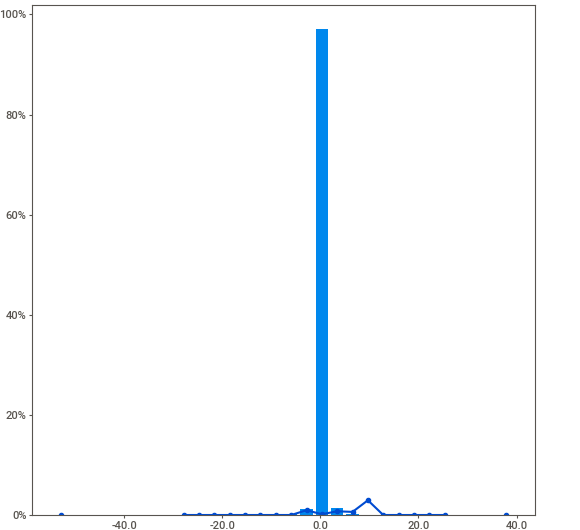
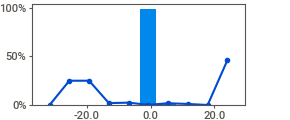
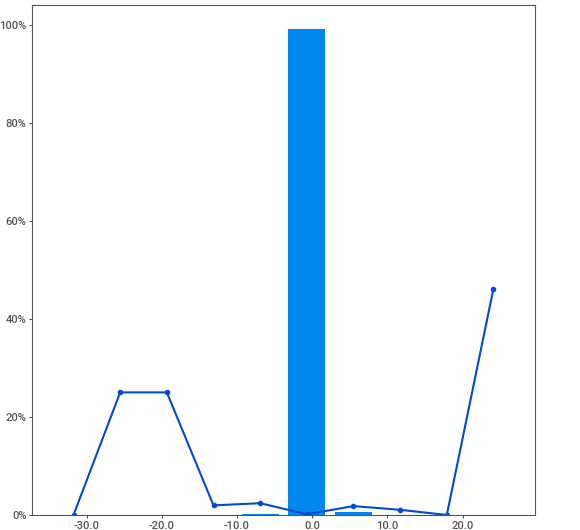
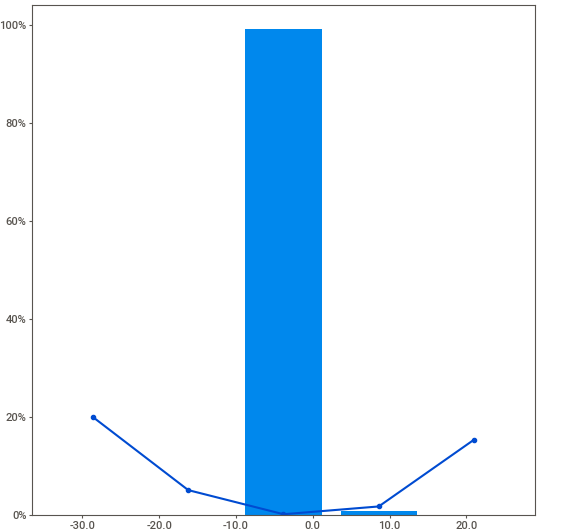
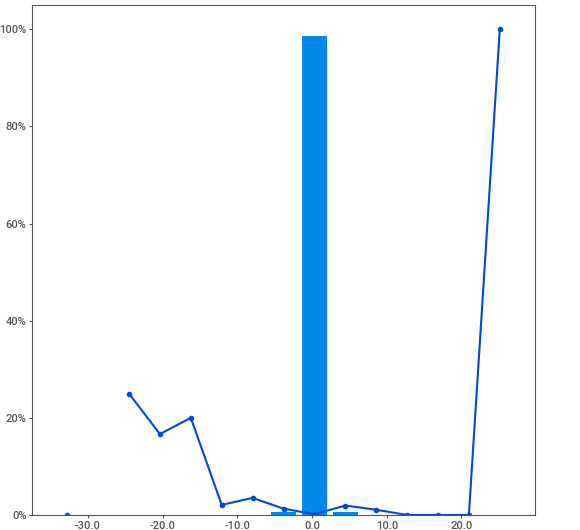
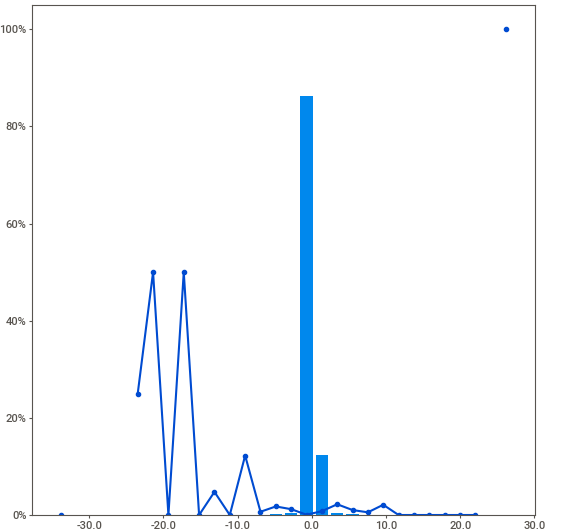
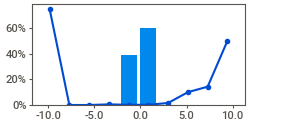
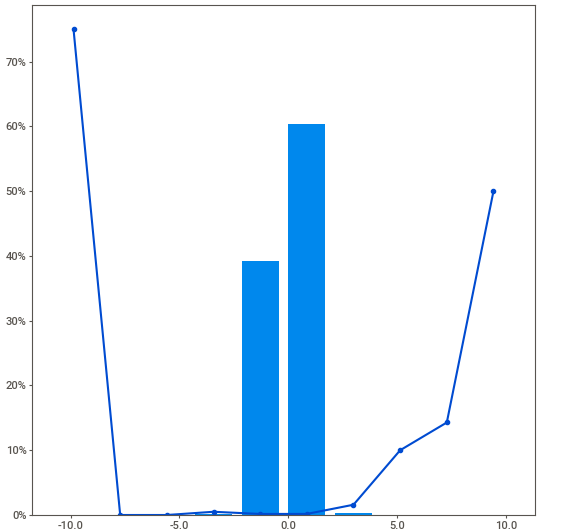
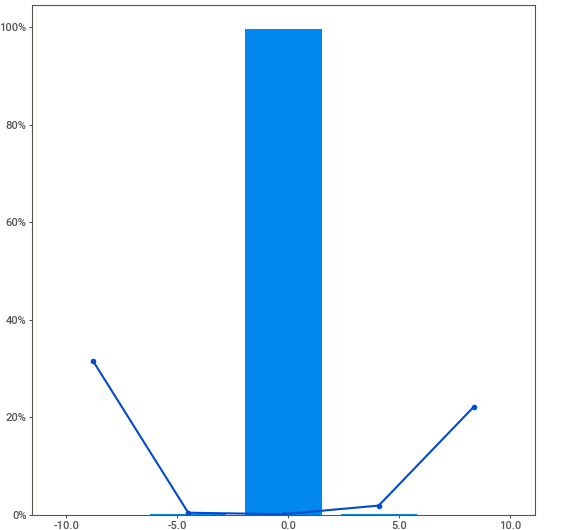
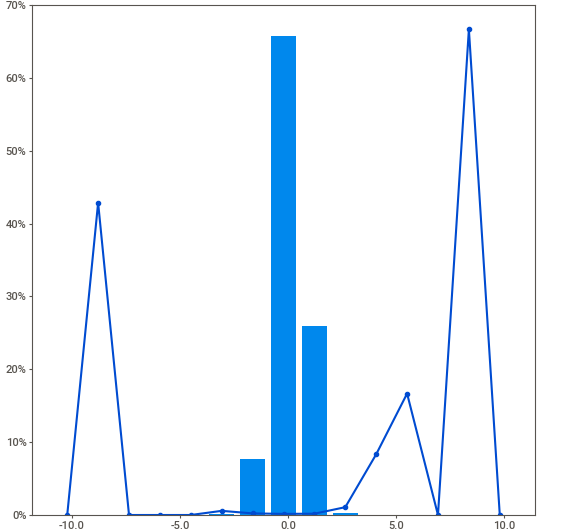
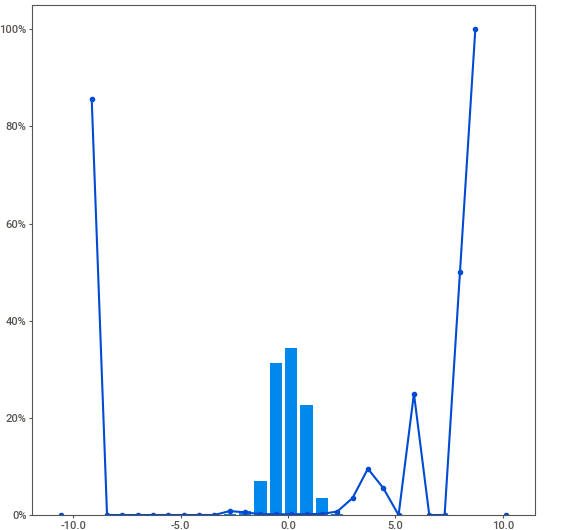
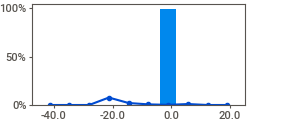
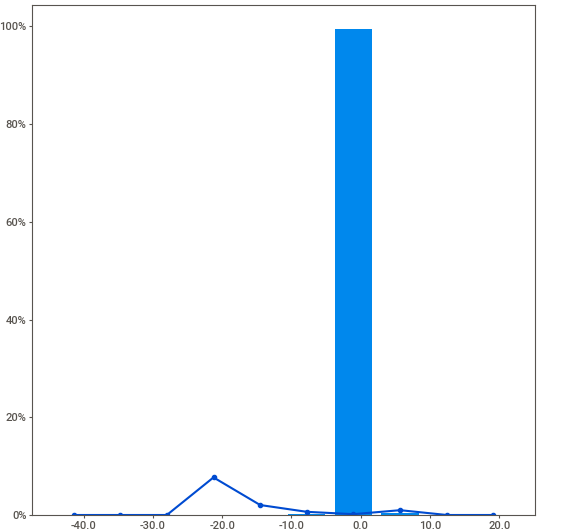
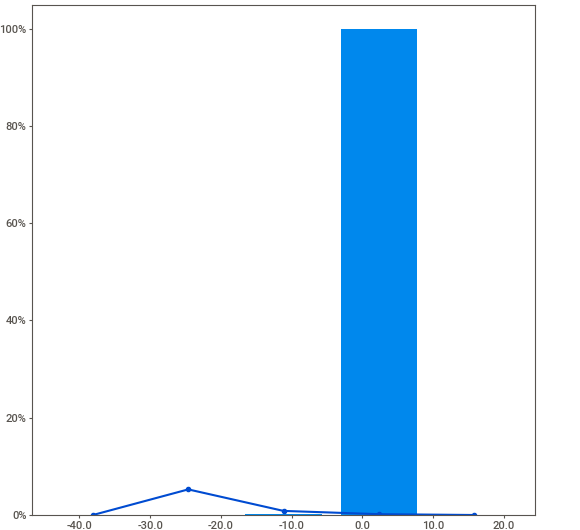
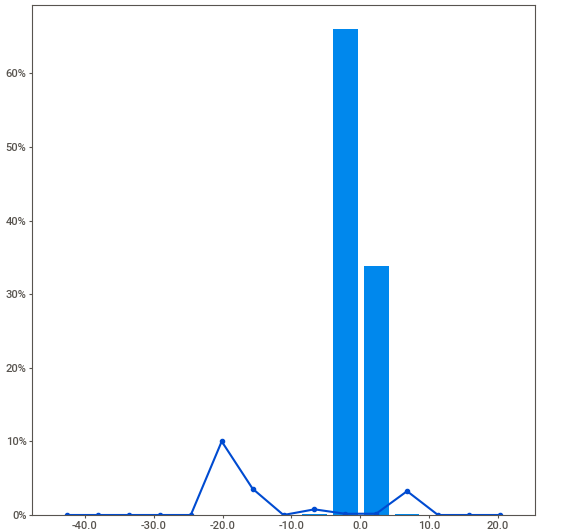
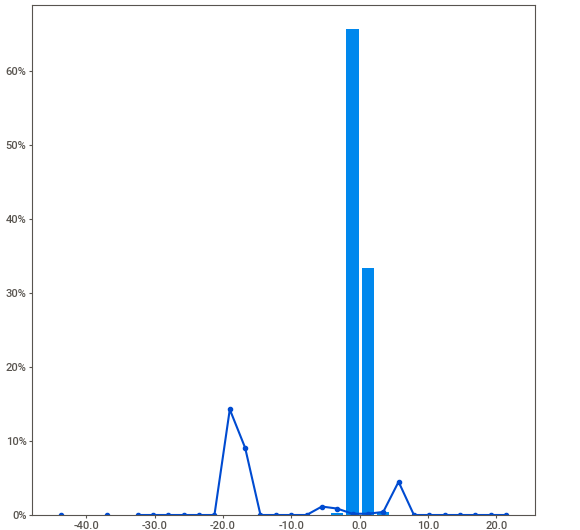
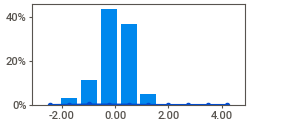
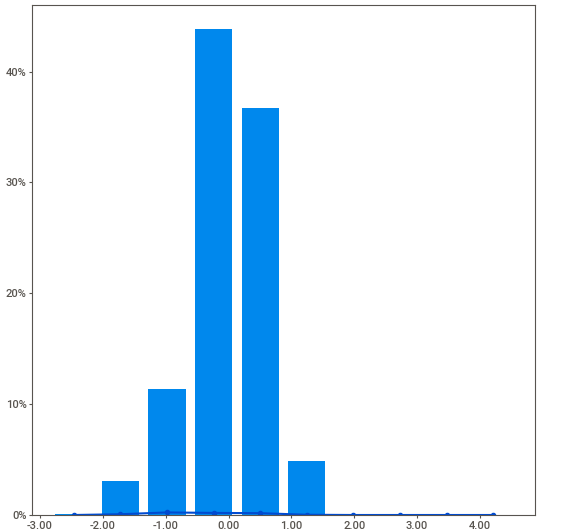
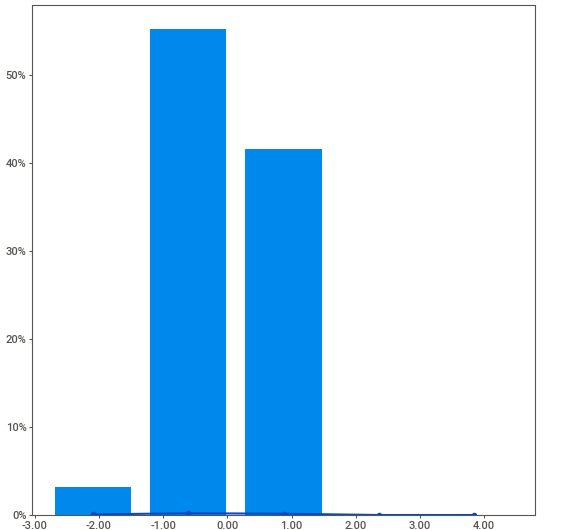
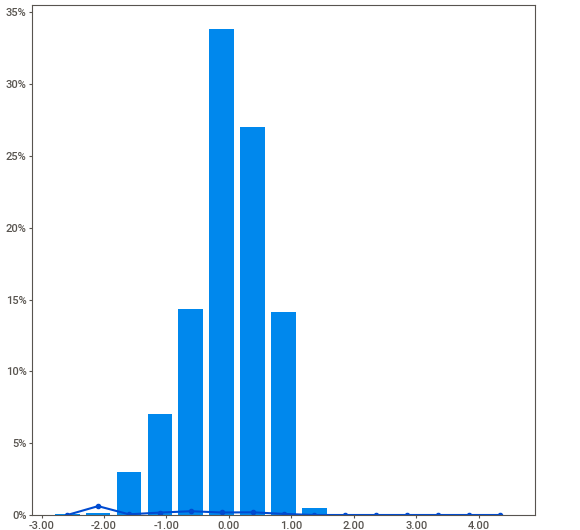
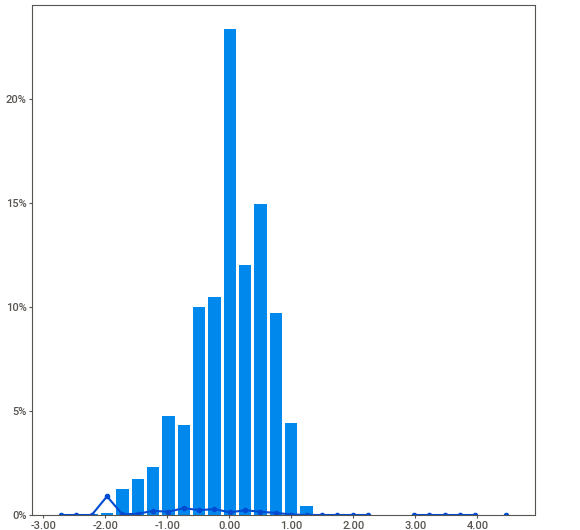
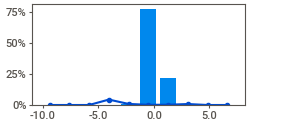
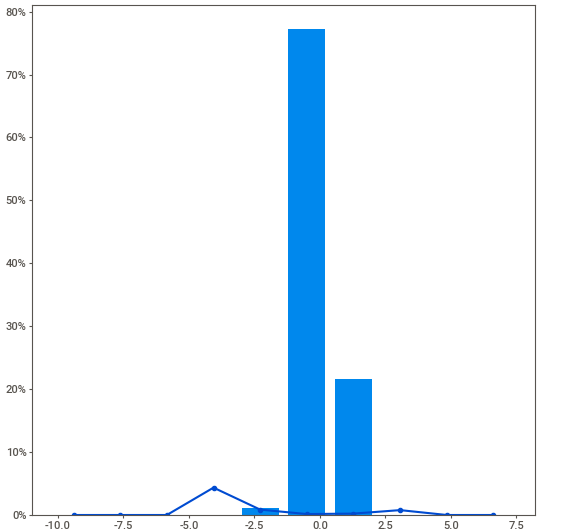
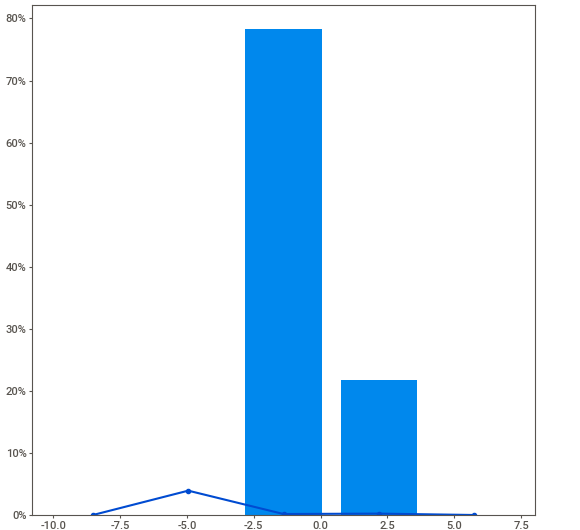
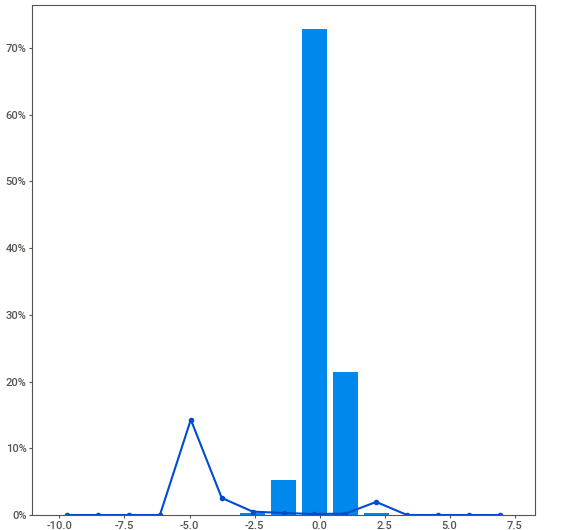
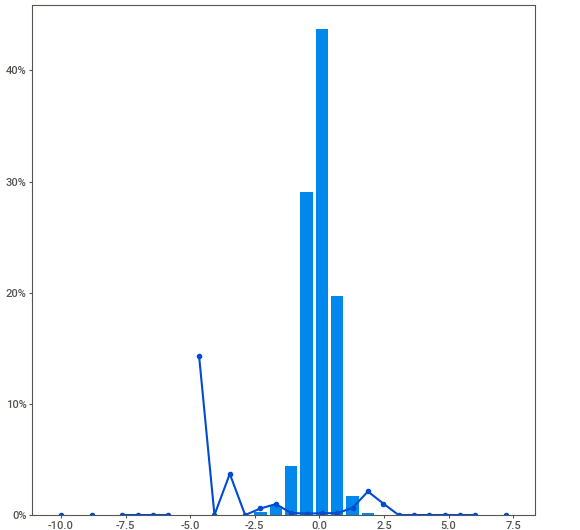
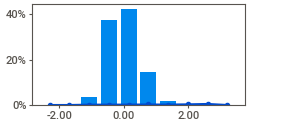
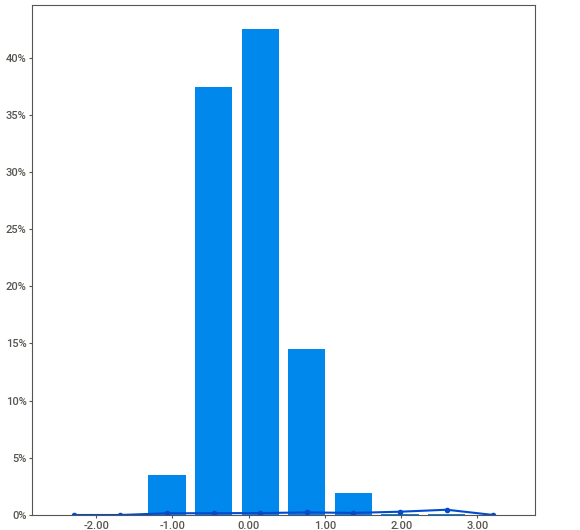
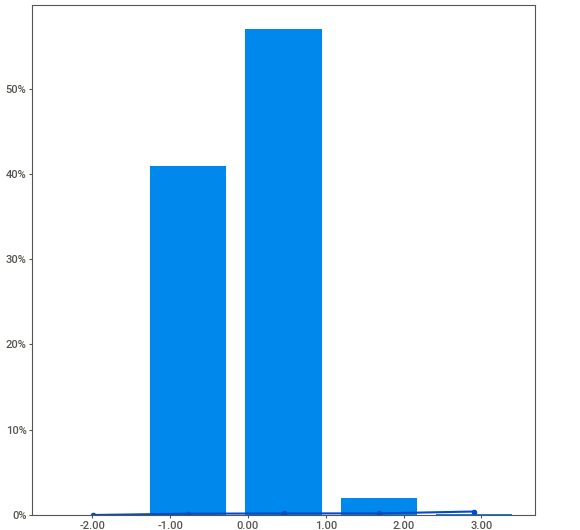
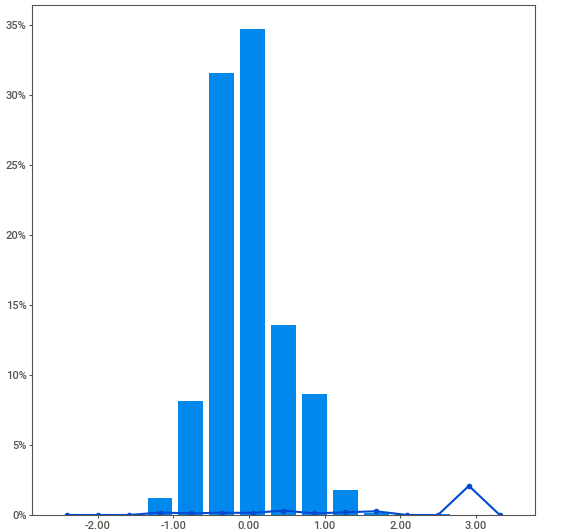
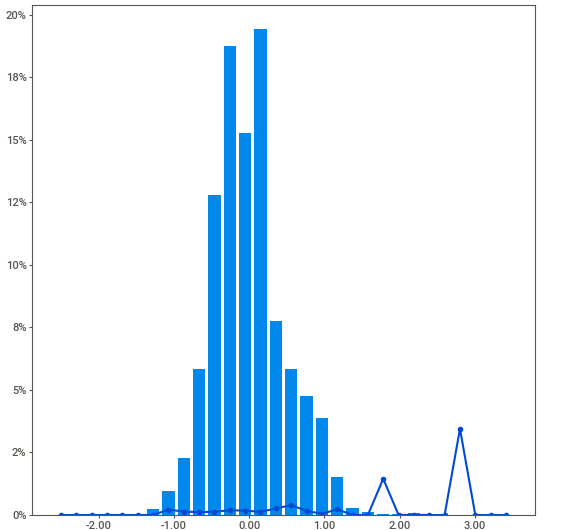
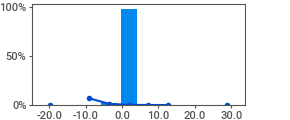
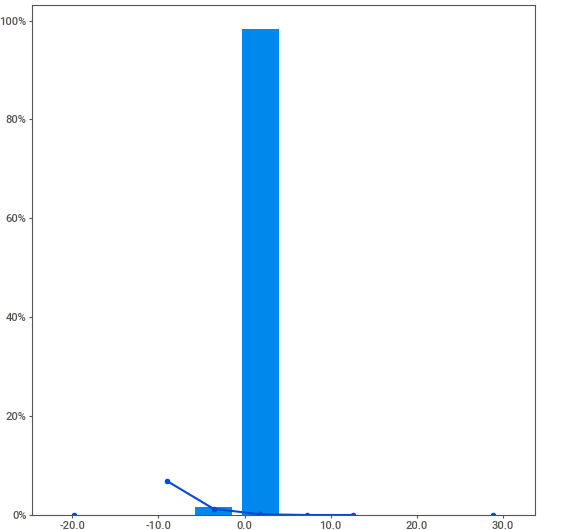
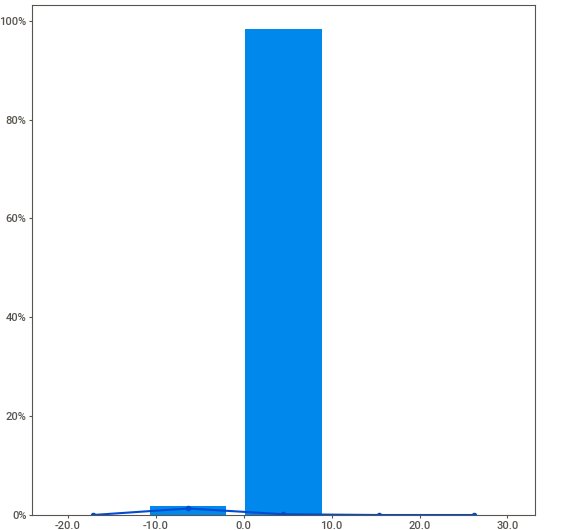
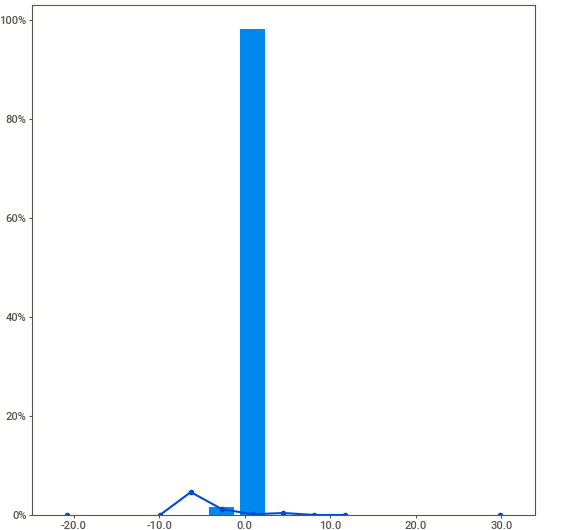
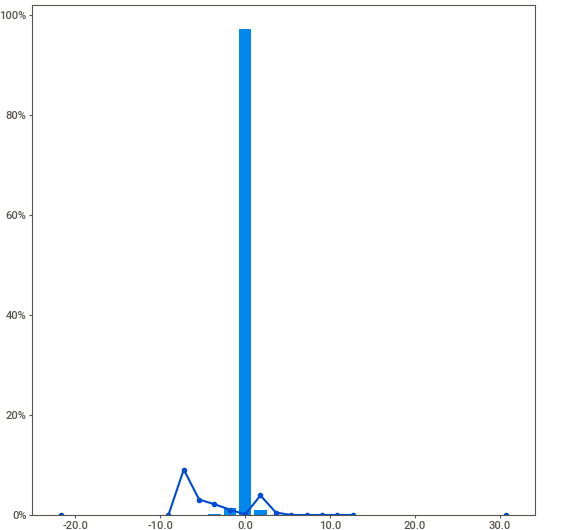
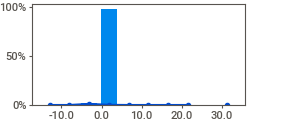
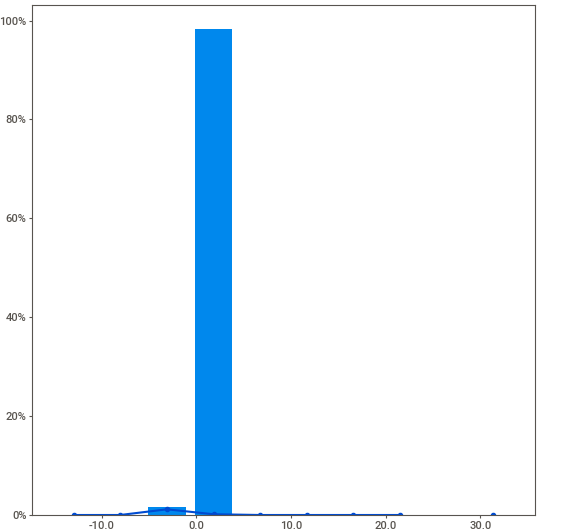
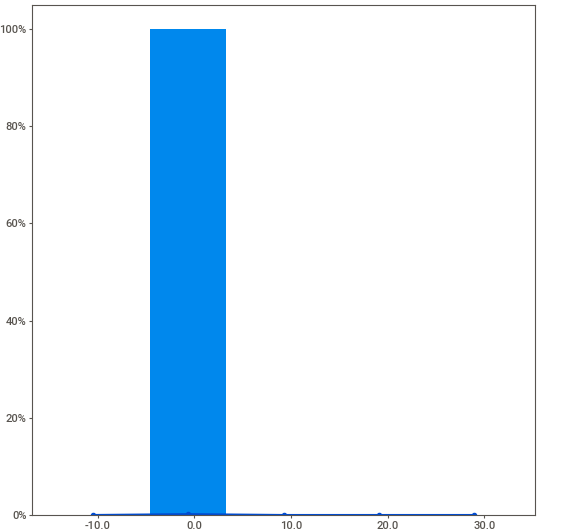
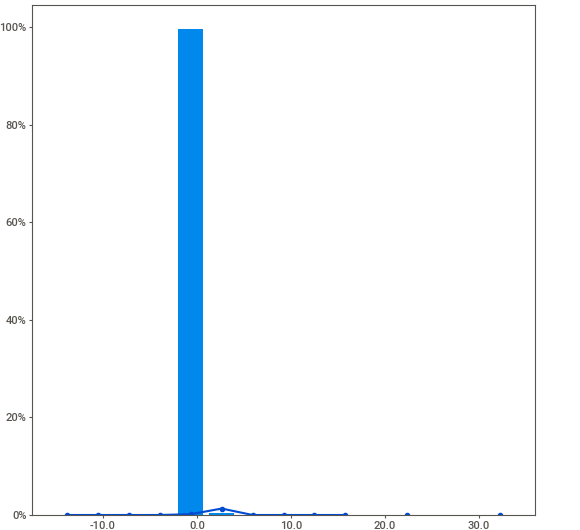
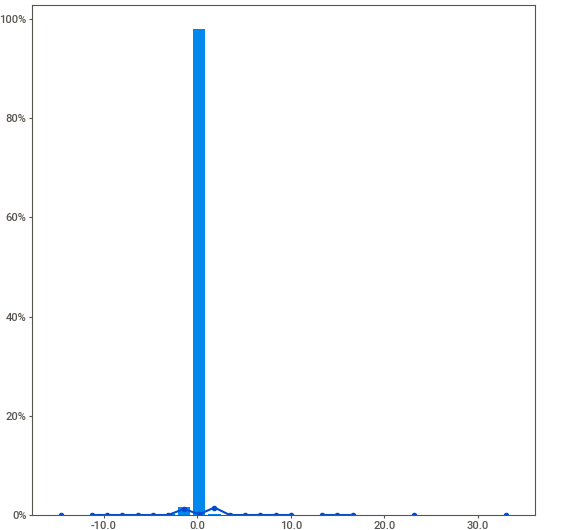
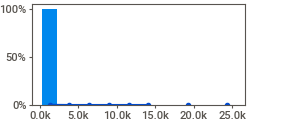
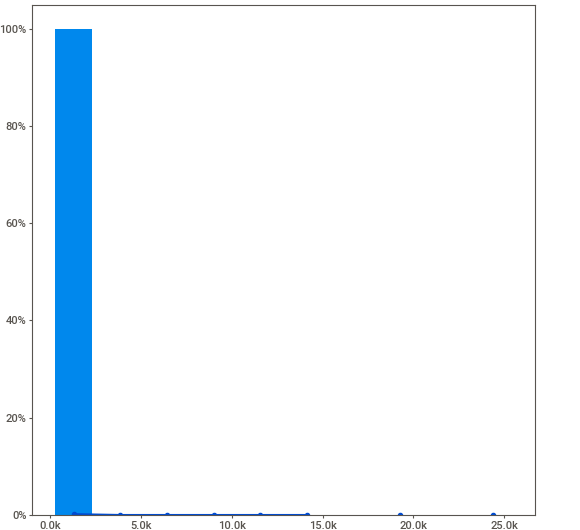
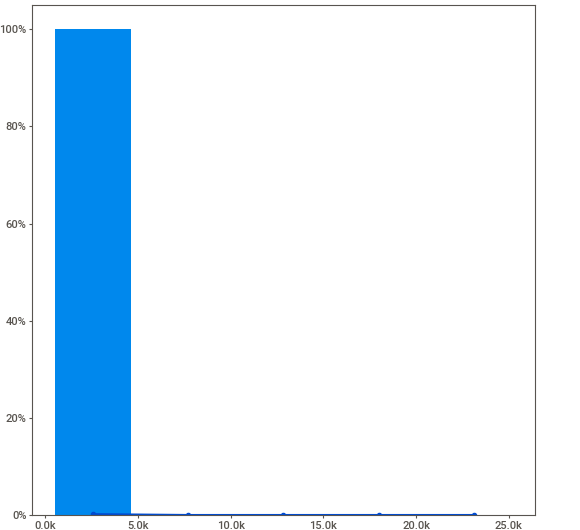
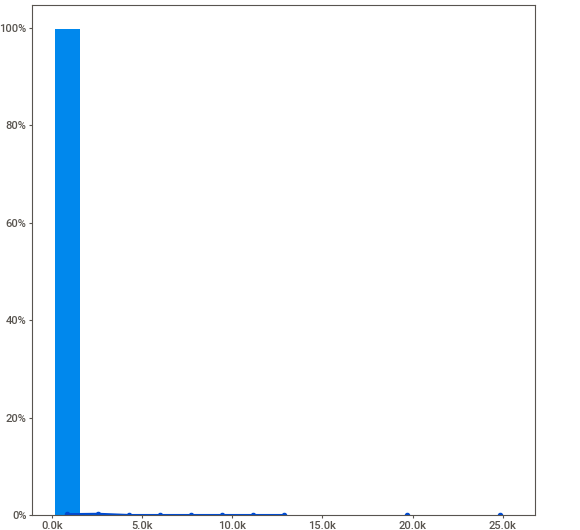
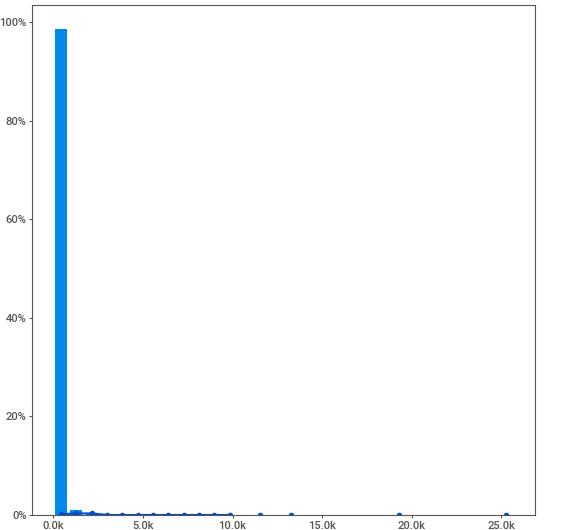
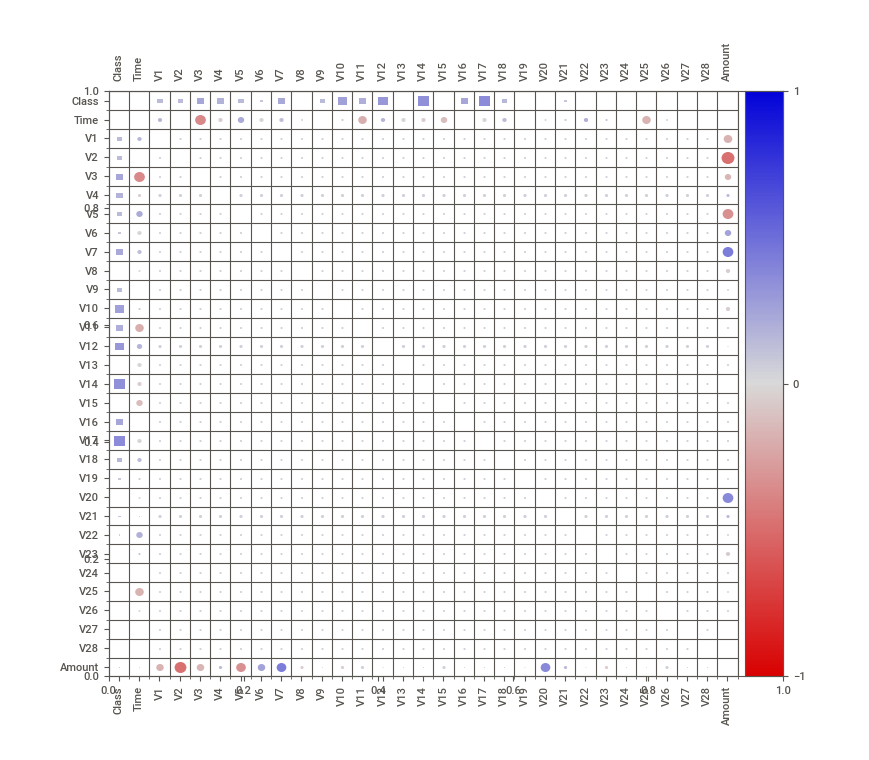
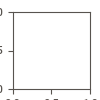

In [6]:
report.show_notebook()

The amount covers a huge range, thus converting it to log space 

In [4]:
cleaned_df = cl.copy_df(raw_df)

# we don't want the `Time` column.
cl.pop_column(cleaned_df, 'Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Amount'] = np.log(cl.pop_column(cleaned_df, 'Amount')+eps)

In [5]:
from sklearn.model_selection import train_test_split
from utils.numpy_utils import Numpy_Utils
npu = Numpy_Utils()

# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = npu.to_numpy(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = npu.to_numpy(val_df.pop('Class'))
test_labels = npu.to_numpy(test_df.pop('Class'))

train_features = npu.to_numpy(train_df)
val_features = npu.to_numpy(val_df)
test_features = npu.to_numpy(test_df)

In [6]:
print(f'Average class probability in training set:   {train_labels.mean():.4f}')
print(f'Average class probability in validation set: {val_labels.mean():.4f}')
print(f'Average class probability in test set:       {test_labels.mean():.4f}')

Average class probability in training set:   0.0017
Average class probability in validation set: 0.0018
Average class probability in test set:       0.0017


In [7]:

from utils.sklearn_utils import sklearn_utils

sk = sklearn_utils()


train_features = sk.fit_transform_scaler(train_features)

val_features = sk.scaler_transform(val_features)
test_features = sk.scaler_transform(test_features)

train_features = npu.clip(train_features, -5, 5)
val_features = npu.clip(val_features, -5, 5)
test_features = npu.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


In [8]:
import keras
METRICS = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

2024-04-17 13:30:44.265345: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 13:30:45.483126: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 13:30:48.537282: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 13:30:51.164364: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [11]:
model = make_model()
model.summary()

/home/codespace/.cache/pypoetry/virtualenvs/ml-ai-automation-FvOh802b-py3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497 (1.94 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.predict(train_features[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[0.6856077 ],
       [0.3376347 ],
       [0.39007622],
       [0.64427876],
       [0.54747784],
       [0.98451096],
       [0.60426176],
       [0.6831979 ],
       [0.39073107],
       [0.31208664]], dtype=float32)

In [15]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 1)